<a href="https://colab.research.google.com/github/defesagit/ProyectoBanco/blob/main/ProyectoBancoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Descripcón del Problema**

Las amenazas financieras están mostrando una tendencia sobre el riesgo crediticio de los bancos comerciales a medida que ha surgido la increíble mejora en la industria financiera. De esta forma, una de las mayores amenazas a las que se enfrentan los bancos comerciales es la predicción del riesgo de los clientes de crédito.

Los estudios recientes se centran principalmente en mejorar el rendimiento del clasificador para la predicción de incumplimiento de tarjetas

# **2)Depuración de Datos**



## **2.1 Librerias**

In [4]:
import numpy as np # Para calculo matricial y matematicas
import pandas as pd # Para depurar datos
#! pip install numpy
import seaborn as sns


## **2.2 Importar Datos**

In [5]:
url="https://raw.githubusercontent.com/defesagit/ProyectoBanco/main/UCI_Credit_Card%20(1).csv"

In [6]:
df=pd.read_csv(url)

In [7]:
df=df.reset_index(drop=True)

In [8]:
#Encabezado
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## **2.3 Dimensiòn**

In [9]:
print(df.shape)

(30000, 25)


## **2.4 Diccionario de Variables**

* ID : ID de cada cliente
* Monto_Credito : cantidad del crédito otorgado en dólares NT (incluye crédito individual y familiar / suplementario
* SEXO : Género (1 = masculino, 2 = femenino)
* EDUCACIÓN : (1 = posgrado, 2 = universidad, 3 = bachillerato, 4 = otros, 5 = desconocido, 6 = desconocido)
* MATRIMONIO : Estado civil (1 = casado, 2 = soltero, 3 = otros)
* EDAD : Edad en años
* PAY_0 : Estado de reembolso en septiembre de 2005 (-1 = pago debidamente, 1 = retraso en el pago durante un mes, 2 = retraso en el pago durante dos meses,… 8 = retraso en el pago durante ocho meses, 9 = retraso en el pago durante nueve meses o más)
* PAY_2 : Estado de reembolso en agosto de 2005 (escala igual a la anterior)
* PAY_3 : Estado de reembolso en julio de 2005 (escala igual a la anterior)
* PAY_4 : Estado de reembolso en junio de 2005 (escala igual a la anterior)
* PAY_5 : Estado de reembolso en mayo de 2005 (escala igual a la anterior)
* PAY_6 : Estado de reembolso en abril de 2005 (escala igual a la anterior)
* BILL_AMT1 : Monto del extracto de la factura en septiembre de 2005 (dólar NT)
* BILL_AMT2 : Monto del extracto de la factura en agosto de 2005 (dólar NT)
* BILL_AMT3 : Monto del extracto de la factura en julio de 2005 (dólar NT)
* BILL_AMT4 : Monto del extracto de la factura en junio de 2005 (dólar NT)
* BILL_AMT5 : Monto del extracto de la factura en mayo de 2005 (dólar NT)
* BILL_AMT6 : Monto del extracto de la factura en abril de 2005 (dólar NT)
* PAY_AMT1 : Monto del pago anterior en septiembre de 2005 (dólar NT)
* PAY_AMT2 : Monto del pago anterior en agosto de 2005 (dólar NT)
* PAY_AMT3 : Monto del pago anterior en julio de 2005 (dólar NT)
* PAY_AMT4 : Monto del pago anterior en junio de 2005 (dólar NT)
* PAY_AMT5 : Monto del pago anterior en mayo de 2005 (dólar NT)
* PAY_AMT6 : Monto del pago anterior en abril de 2005 (dólar NT)
* default.payment.next.month : pago predeterminado (1 = sí, 0 = no)

In [10]:
print(df.columns.to_list())

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


## **2.5 Recodificación de las variables**

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [12]:
##Id debe ser tipo string
df.ID=df.ID.astype(str)

In [13]:
# Validar Variable Sex
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [14]:
## Sex debe ser Categorica
df.SEX=df.SEX.astype("category")

In [15]:
## Validar Educación
#Educación: ()
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
df.EDUCATION[df.EDUCATION==6]=5
df.EDUCATION[df.EDUCATION==4]=5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
df.EDUCATION[df.EDUCATION==0]=np.nan
df.EDUCATION[df.EDUCATION==5]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
#Covertir Educacion en Categorica
df.EDUCATION=df.EDUCATION.astype("category")

In [19]:
## Vali Estado Civil
# Estado (1=casado, 2= soltero, 3=Otros)
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [20]:
df.MARRIAGE[df.MARRIAGE==0]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
##convertir estado civil en categorica
df.MARRIAGE=df.MARRIAGE.astype("category")

In [22]:
##Valid
df[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]=df[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].astype("category")

In [23]:
##default.paument.next.mont
df["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [24]:
df["default.payment.next.month"].value_counts()/len(df)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

In [25]:
##cambiar el nombre
df.rename(columns={"default.payment.next.month":"Mora"},inplace=True)

In [26]:
## Convertir Mora en Categorica
df.Mora=df.Mora.astype("category")

##**2.6 Tratamiento de valores nulos**

In [27]:
df.isnull().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION    468
MARRIAGE      54
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
Mora           0
dtype: int64

In [28]:
df.isnull().sum()/len(df)

ID           0.0000
LIMIT_BAL    0.0000
SEX          0.0000
EDUCATION    0.0156
MARRIAGE     0.0018
AGE          0.0000
PAY_0        0.0000
PAY_2        0.0000
PAY_3        0.0000
PAY_4        0.0000
PAY_5        0.0000
PAY_6        0.0000
BILL_AMT1    0.0000
BILL_AMT2    0.0000
BILL_AMT3    0.0000
BILL_AMT4    0.0000
BILL_AMT5    0.0000
BILL_AMT6    0.0000
PAY_AMT1     0.0000
PAY_AMT2     0.0000
PAY_AMT3     0.0000
PAY_AMT4     0.0000
PAY_AMT5     0.0000
PAY_AMT6     0.0000
Mora         0.0000
dtype: float64

* Variables tipo Factor se imputan por Moda
* Variables numericas, por promedio si son normales, de lo contrario por la Mediana

In [29]:
from scipy import stats

In [30]:
#! pip install scipy

In [31]:
moda_EDUCATION=stats.mode(df.EDUCATION)
print(moda_EDUCATION)

ModeResult(mode=array([2.]), count=array([14030]))


In [32]:
print(moda_EDUCATION[0][0])

2.0


In [33]:
df.EDUCATION=df.EDUCATION.replace(np.nan,moda_EDUCATION[0][0])

In [34]:
df.EDUCATION=df.EDUCATION.astype("category")

In [35]:
moda_Civil=stats.mode(df.MARRIAGE)
print(moda_Civil)

ModeResult(mode=array([2.]), count=array([15964]))


In [36]:
df.MARRIAGE=df.MARRIAGE.replace(np.nan,moda_Civil[0][0])
df.MARRIAGE=df.MARRIAGE.astype("category")

## **2.7 Conteo de Variables**

In [37]:
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(VariablesNumericas)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [38]:
len(VariablesNumericas)

14

In [39]:
##Variables Categoricas
VariablesCategoricas=df.select_dtypes(include=["category"]).columns.to_list()
print(VariablesCategoricas)
print(len(VariablesCategoricas))

['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Mora']
10


In [40]:
##Variables tipo texto
VariablesTexto=df.select_dtypes(include=["object"]).columns.to_list()
print(VariablesTexto)

['ID']


#**3) Analisis Exploratorio y Descriptivo de los Datos**

## **3.1 Analisis Univariado Tipo Numérico**

In [41]:
MontoCredito=df.LIMIT_BAL

### **3.1.1 Normalidad**

In [42]:
import matplotlib.pyplot as plt

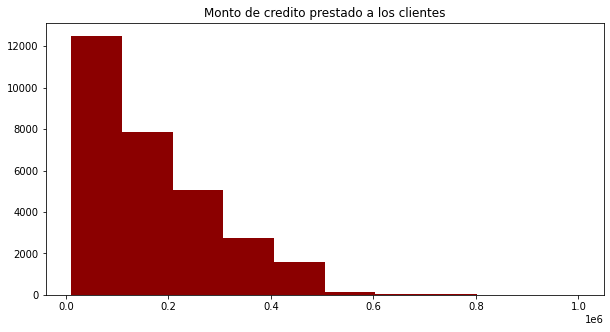

In [43]:
## Histograma
plt.figure(figsize=(10,5))
plt.hist(MontoCredito,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()
MontoCredito=df.LIMIT_BAL


In [44]:
PromedioInicial=np.mean(MontoCredito)
print(PromedioInicial)

167484.32266666667


###**Verificar normalidad**

**Grafica Q-Q**

Gráfico Q-Q Los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

In [45]:
import statsmodels.api as sm

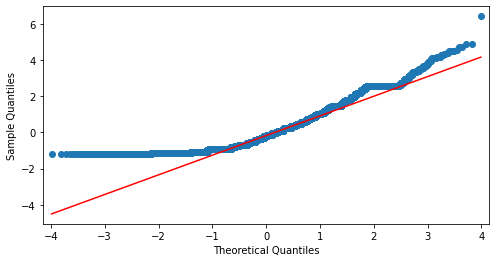

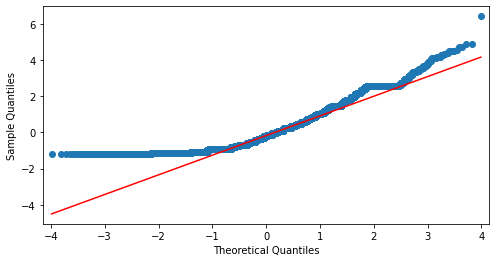

In [46]:
fig, ax=plt.subplots(figsize=(8,4))
sm.qqplot(MontoCredito,fit=True,line="q",ax=ax)

**Métodos Analíticos** Una prueba de hipótesis es una regla que especifica si se puede aceptar o rechazar una afirmación acerca de una población dependiendo de la evidencia proporcionada por una muestra de datos.

Un punto de decisión importante al trabajar con una muestra de datos es si utilizar métodos estadísticos paramétricos o no paramétricos. Los métodos estadísticos paramétricos asumen que los datos tienen una distribución conocida y específica, a menudo una distribución gaussiana. Si una muestra de datos no es gaussiana, entonces se violan los supuestos de las pruebas estadísticas paramétricas y deben usarse métodos estadísticos no paramétricos.

**Interpretación de una prueba**

H0: El monto del credito proviene de una distribucción Normal
Ha:El monto del credito No proviene de una distribucción Normal
p valor;

p <= alfa : rechazar H0, no es normal.
p> alpha : No rechazar H0, No significa que sea cierta normalidad, Significa que es muy probable que sea Normal
Prueba de Shapiro-Wilk Shapiro-Wilk evalúa una muestra de datos y cuantifica la probabilidad de que los datos se extraigan de una distribución gaussiana, llamada así por Samuel Shapiro y Martin Wilk.

En la práctica, se cree que la prueba de Shapiro-Wilk es una prueba confiable de normalidad, aunque se sugiere que la prueba puede ser adecuada para muestras de datos más pequeñas, por ejemplo, miles de observaciones o menos

**D'Agostino's K-squared test** La prueba de D'Agostino-Pearson verifica si la forma de la distribución es similar a la forma de la distribución normal. Esta es una combinación de la prueba de asimetría y la prueba de curtosis

In [47]:
stat,pvalue=stats.shapiro(MontoCredito)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [48]:
pvalue

0.0



*   Segun shapiro, el monto de credito no es Normal



In [49]:
k2,pvalue2= stats.normaltest(MontoCredito)

In [50]:
pvalue2

0.0

* Ninguno de los test muestra evidencias para Aceptar Normalidad

**Consecuencias de la falta de normalidad**

El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos (t-test, anova,…) y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.

**Teorema del Limite Central**

El teorema del límite central es un teorema fundamental de probabilidad y estadística. El teorema describe la distribución de la media de una muestra aleatoria proveniente de una población con varianza finita. Cuando el tamaño de la muestra es lo suficientemente grande, la distribución de las medias sigue aproximadamente una distribución normal.

### **3.1.2 Normalidad puede estar afectada por Datos Atipicos**
* Detectar Datos Atípicos Univariado
Análisis Gráfico Univariado

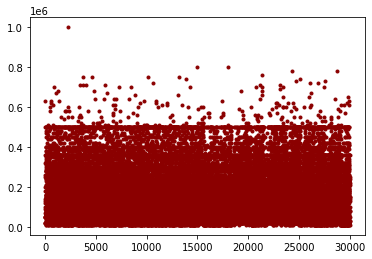

In [51]:
plt.plot(MontoCredito,".",color="darkred")
plt.show()

**Boxplot**

In [52]:
MontoCredito.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

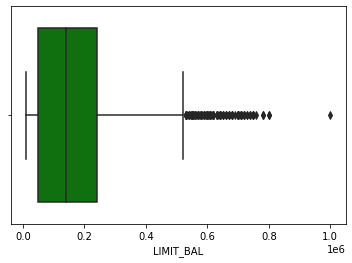

In [53]:
sns.boxplot(x=MontoCredito,color="green")

In [54]:
## Limites
## Limite Inferior
q1,q3=np.percentile(MontoCredito,[25,75])

In [55]:
q1

50000.0

In [56]:
q3

240000.0

In [57]:
RIC=q3-q1

In [58]:
RIC

190000.0

In [59]:
#Limite Superior
Limite_Superior=q3+1.5*(RIC)

In [60]:
Limite_Superior

525000.0

In [61]:
#Limite Inferior
Limite_Inferior=q1-1.5*(RIC)

In [62]:
Limite_Inferior

-235000.0

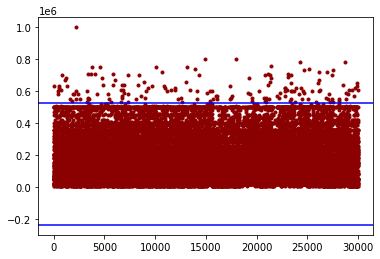

In [63]:
plt.plot(MontoCredito,".",color="darkred")
plt.axhline(y=Limite_Superior,color="blue")
plt.axhline(y=Limite_Inferior,color="blue")
plt.show()

**Filtrar Datos Atipicos**

In [64]:
df_Monto_Atipicos= df[(df.LIMIT_BAL >= Limite_Superior) | (df.LIMIT_BAL<= Limite_Inferior)]

In [65]:
df_Monto_Atipicos.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora
12,13,630000.0,2,2.0,2.0,41,-1,0,-1,-1,...,6500.0,6500.0,2870.0,1000.0,6500.0,6500.0,6500.0,2870.0,0.0,0
433,434,580000.0,2,1.0,1.0,36,0,0,0,0,...,169365.0,168755.0,167964.0,6422.0,6565.0,5951.0,6006.0,5894.0,5946.0,0
451,452,600000.0,1,1.0,1.0,53,2,2,0,0,...,447130.0,440982.0,434715.0,0.0,18000.0,16000.0,16000.0,21000.0,20000.0,1
527,528,620000.0,2,2.0,1.0,45,2,2,0,0,...,163781.0,167159.0,170894.0,0.0,6200.0,6000.0,6000.0,6500.0,6000.0,1
555,556,630000.0,2,2.0,1.0,47,0,0,0,-1,...,2632.0,8654.0,0.0,38187.0,1207.0,2632.0,8654.0,0.0,4981.0,0


In [66]:
df_Monto_Atipicos.shape

(167, 25)

In [67]:
(len(df_Monto_Atipicos)/len(df))*100

0.5566666666666666

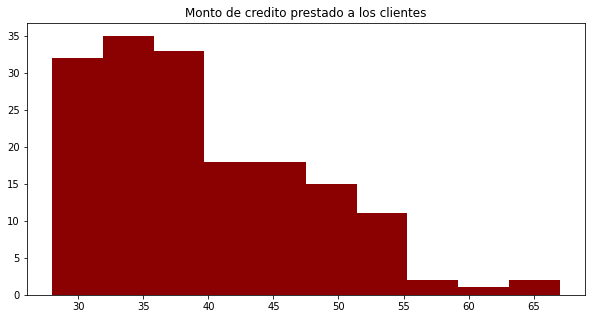

In [68]:
plt.figure(figsize=(10,5))
plt.hist(df_Monto_Atipicos.AGE,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()

**Histograma por Sexo**

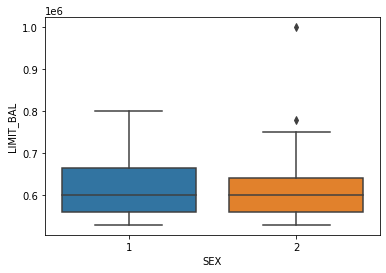

In [69]:
sns.boxplot(x="SEX",y="LIMIT_BAL",data=df_Monto_Atipicos)

**Promedio sin Datos Atipicos**

In [70]:
df_Sin_Monto_Atipicos= df[(df.LIMIT_BAL < Limite_Superior) & (df.LIMIT_BAL > Limite_Inferior)]
df_Sin_Monto_Atipicos.shape

(29833, 25)

In [71]:
print(PromedioInicial)

167484.32266666667


In [72]:
PromedioSinAtipico=np.mean(df_Sin_Monto_Atipicos.LIMIT_BAL)
print(PromedioSinAtipico)

164963.2849529045


**Probar Normalidad**

In [73]:
stat,pvalue=stats.shapiro(df_Sin_Monto_Atipicos.LIMIT_BAL)
pvalue

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

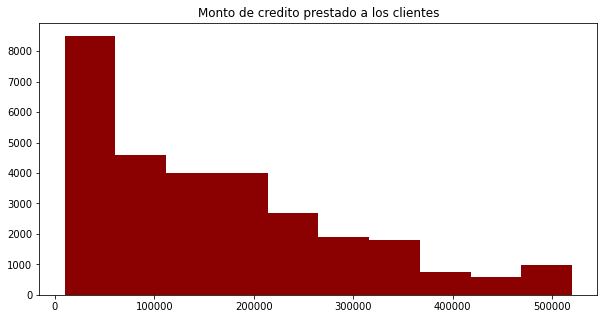

In [74]:
plt.figure(figsize=(10,5))
plt.hist(df_Sin_Monto_Atipicos.LIMIT_BAL,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()

**Exportar Excel**

In [76]:
df_Monto_Atipicos.to_excel("/content/drive/MyDrive/Diplomado_2022_01/ModelosSupervisado/Clasificacion/ClientesAtipicos.xlsx",
                           index=False)

FileNotFoundError: ignored

* No parametrico
* Simulacion Computacional

### **3.1.3 Enfoque no Paramétrico para calcular un paramétro Poblacional: Simulación computacional**

Bootstrapping El bootstrapping (o bootstrap) es un método de remuestreo propuesto por Bradley Efron en 1979. Se utiliza para aproximar la distribución en el muestreo de un estadístico. Se usa frecuentemente para aproximar el sesgo o la varianza de un análisis estadístico, así como para construir intervalos de confianza o realizar contrastes de hipótesis sobre parámetros de interés. En la mayor parte de los casos no pueden obtenerse expresiones cerradas para las aproximaciones bootstrap y por lo tanto es necesario obtener remuestras en un ordenador para poner a prueba el método. La enorme potencia de cálculo de los ordenadores actuales facilita considerablemente la aplicabilidad de este método tan costoso computacionalmente

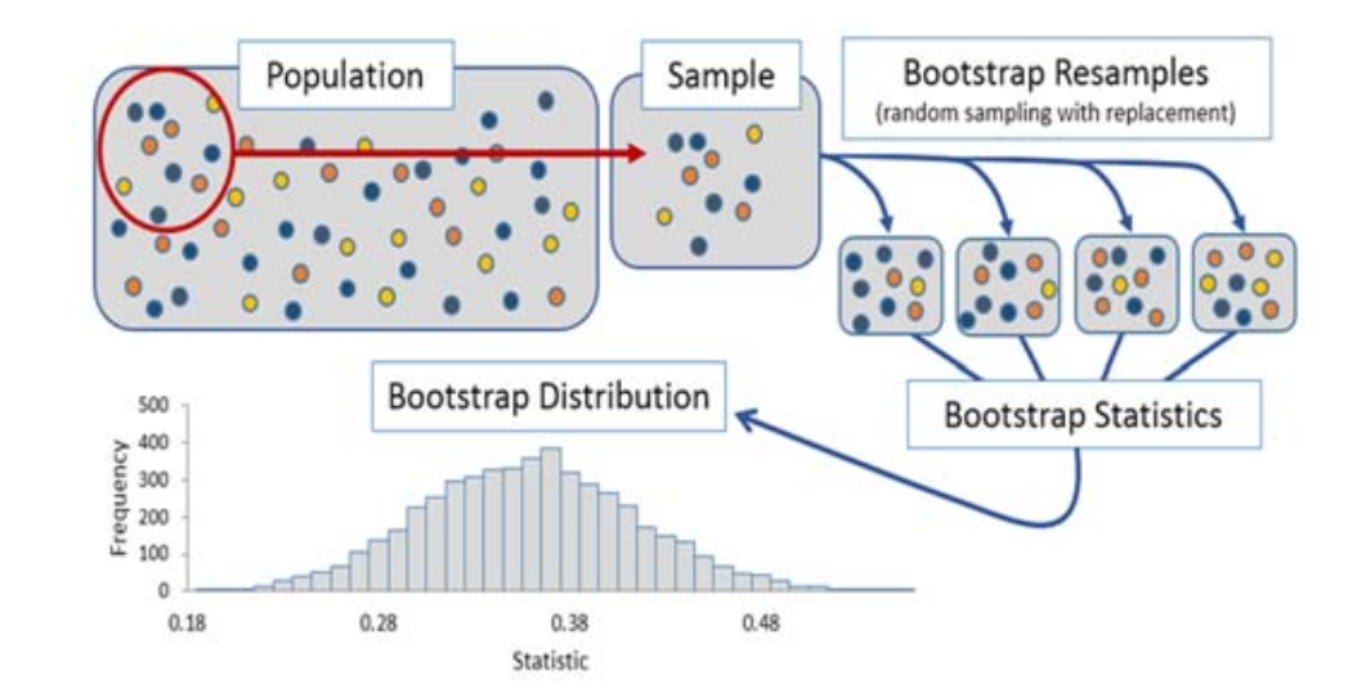image.png

In [77]:
from scipy.stats import trim_mean
from matplotlib import style

# estilo de graficas
style.use('ggplot') or plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [78]:
df.shape

(30000, 25)

In [79]:
print(PromedioInicial)
print(PromedioSinAtipico)

167484.32266666667
164963.2849529045


In [80]:
## FUncion para calcular Media
def calcular_media(x):
  estadistico=np.mean(x)
  return estadistico

In [81]:
def calcular_mediana():
  estadistico=np.median(x)
  return estadistico

In [82]:
def boostraping(x,fun_estasdistico,n_iteraciones=10000,Mu=1000):
    n=Mu
    dist_boot=np.full(shape=n_iteraciones,fill_value=np.nan) # se crea el vector
    
    for i in tqdm(range(n_iteraciones)):
        resample=np.random.choice(x,size=n,replace=True)
        dist_boot[i]=fun_estasdistico(resample)
        
    return dist_boot

**Ejecucion del Boostraping**

In [83]:
Promedio_Boostraping=boostraping(x=df_Sin_Monto_Atipicos.LIMIT_BAL,
                                 fun_estasdistico=calcular_media,
                                 n_iteraciones=200000,
                                 Mu=5000)

100%|██████████| 200000/200000 [00:34<00:00, 5722.68it/s] 


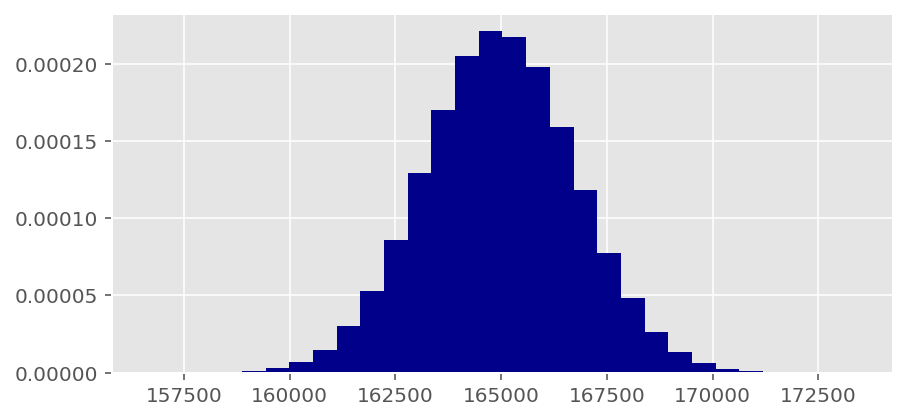

In [84]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(Promedio_Boostraping,bins=30, density=True,color="darkblue")
plt.show()

In [85]:
Promedio_Boostraping=np.mean(Promedio_Boostraping)

In [86]:
print(Promedio_Boostraping) # Infrencia Remuestro Bossetraping # Yo le creo a este

164969.20166623997


In [87]:
Limite_Superior

525000.0

* Por TLC su cumple

In [88]:
y=df.LIMIT_BAL
#Evitar Notacion Cientifica
pd.options.display.float_format= '{:.2f}'.format
import math 
y=y.to_numpy() ## Arreglo
datos=y
# Regla de Sturges
K=1+3.322*math.log10(len(datos))
periodos=math.ceil(K) ## Aproximacion
inf= datos.min() ## LImite inferior para el primer intervalo
dif=datos.max()
sup= datos.max()+1
Intervalos= pd.interval_range(
    start=inf,
    end=sup,
    periods=periodos,
    name="Intervalo",
    closed="left"
)

td= pd.DataFrame(index=Intervalos)
td["FrecuenciaAbsoluta"]=pd.cut(datos,bins=td.index).value_counts()
td["FrecuenciaRelativa"]=pd.cut(datos,bins=td.index).value_counts()/len(df)*100

In [89]:
td

,FrecuenciaAbsoluta,FrecuenciaRelativa
Intervalo,,
"[10000.0, 71875.0625)",9232,30.77
"[71875.0625, 133750.125)",5309,17.70
"[133750.125, 195625.1875)",4309,14.36
"[195625.1875, 257500.25)",4433,14.78
"[257500.25, 319375.3125)",2426,8.09
"[319375.3125, 381250.375)",2042,6.81
"[381250.375, 443125.4375)",857,2.86
"[443125.4375, 505000.5)",1186,3.95
"[505000.5, 566875.5625)",86,0.29


In [90]:
td.FrecuenciaRelativa[0:5].sum()

85.69666666666667

In [91]:
td.FrecuenciaAbsoluta[0:5].sum()

25709

##**3.2)Análisis Bivariado**
Puede ayudar a determinar en qué medida es posible relacionar el valor de una variable en el caso en que conozcamos el valor de otra variable

In [92]:
df.LIMIT_BAL.var()

16834455682.155386

In [93]:
df.LIMIT_BAL.std()

129747.66156719506

In [94]:
cv = lambda x: np. std (x, ddof = 1 ) / np. mean (x) * 100

In [95]:
cv(df.LIMIT_BAL)

77.46854123500474

###**3.2.1 Numérica vs Numérica**
####**Correlación de Pearson**

La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

1: correlación lineal positiva total.
0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.
-1: correlación lineal negativa total

**Scatterplot**

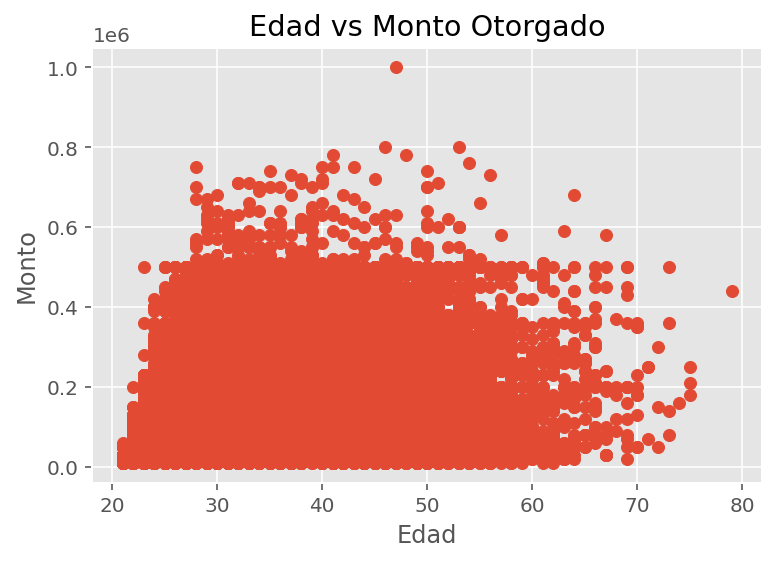

In [96]:
plt.scatter(df.AGE,df.LIMIT_BAL)
plt.title("Edad vs Monto Otorgado")
plt.xlabel("Edad")
plt.ylabel("Monto")
plt.show()

In [97]:
from scipy.stats import pearsonr

In [98]:
pearsonr(df.AGE,df.LIMIT_BAL)[0]

0.14471279755733596

* No hay relacion Lineal entre las dos Variables

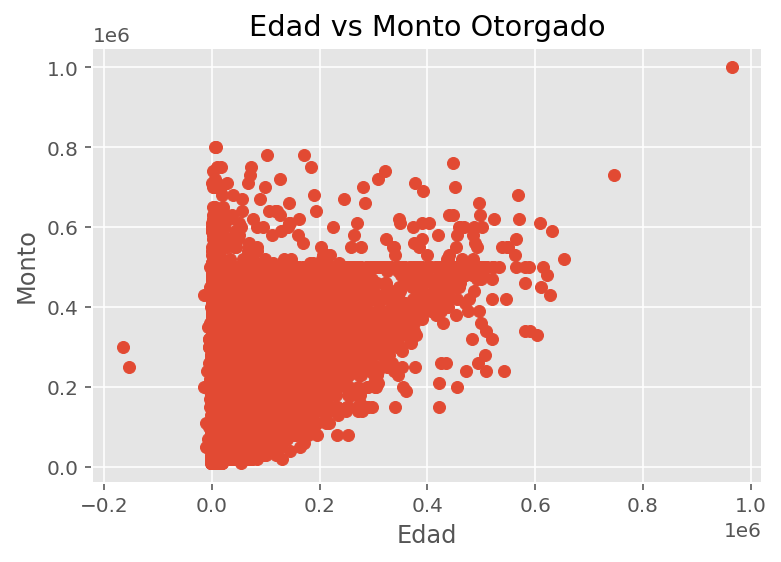

In [99]:
plt.scatter(df.BILL_AMT1,df.LIMIT_BAL)
plt.title("Edad vs Monto Otorgado")
plt.xlabel("Edad")
plt.ylabel("Monto")
plt.show()

In [100]:
pearsonr(df.BILL_AMT1,df.LIMIT_BAL)[0]

0.2854298649649899

**Matrox de correlación**

In [101]:
Matrix_Correlacion=df.corr()
Matrix_Correlacion

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.00,0.14,0.29,0.28,0.28,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22
AGE,0.14,1.00,0.06,0.05,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02
BILL_AMT1,0.29,0.06,1.00,0.95,0.89,0.86,0.83,0.80,0.14,0.10,0.16,0.16,0.17,0.18
BILL_AMT2,0.28,0.05,0.95,1.00,0.93,0.89,0.86,0.83,0.28,0.10,0.15,0.15,0.16,0.17
BILL_AMT3,0.28,0.05,0.89,0.93,1.00,0.92,0.88,0.85,0.24,0.32,0.13,0.14,0.18,0.18
BILL_AMT4,0.29,0.05,0.86,0.89,0.92,1.00,0.94,0.90,0.23,0.21,0.30,0.13,0.16,0.18
BILL_AMT5,0.30,0.05,0.83,0.86,0.88,0.94,1.00,0.95,0.22,0.18,0.25,0.29,0.14,0.16
BILL_AMT6,0.29,0.05,0.80,0.83,0.85,0.90,0.95,1.00,0.20,0.17,0.23,0.25,0.31,0.12
PAY_AMT1,0.20,0.03,0.14,0.28,0.24,0.23,0.22,0.20,1.00,0.29,0.25,0.20,0.15,0.19
PAY_AMT2,0.18,0.02,0.10,0.10,0.32,0.21,0.18,0.17,0.29,1.00,0.24,0.18,0.18,0.16


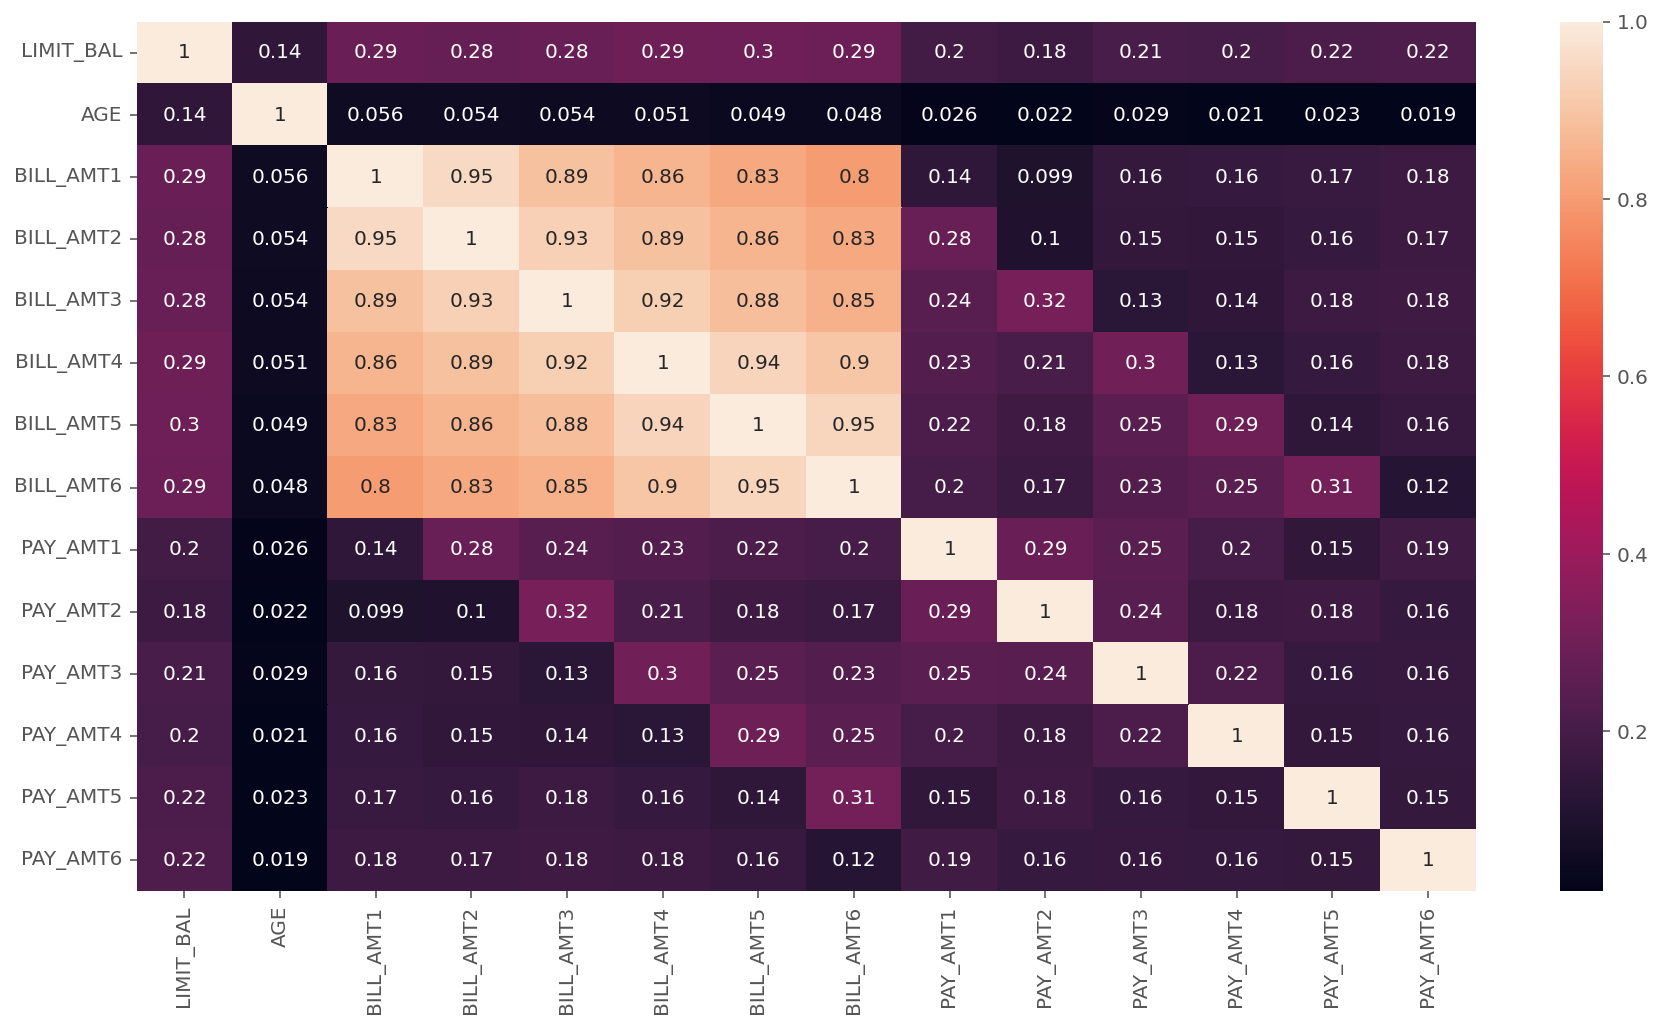

In [102]:
## Garica que nos ayude
fig, ax= plt.subplots(figsize=(15,8))
sns.heatmap(Matrix_Correlacion, annot=True)
plt.show()

###**3.2.2 Categórica vs Numérica**
ANOVA El Análisis de varianza (ANOVA) es un método estadístico utilizado para evaluar si existen diferencias significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetro

####**3.2.2.1 Test de Diferencia de Medias**

In [103]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Mora'],
      dtype='object')

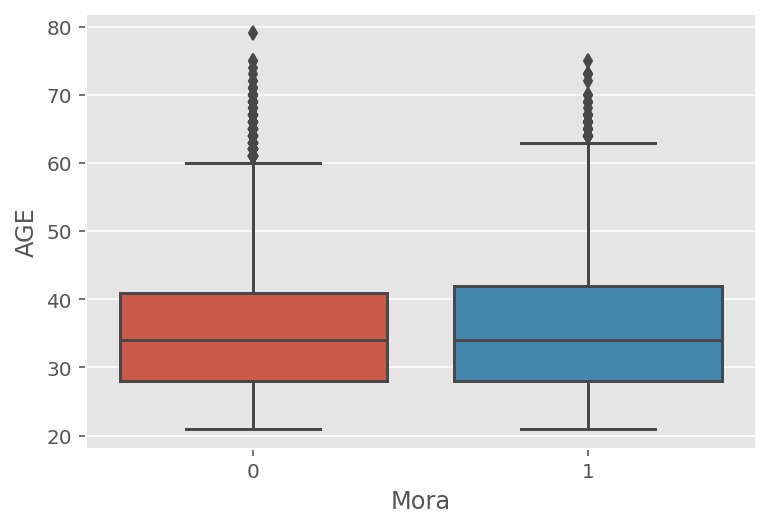

In [104]:
sns.boxplot(x="Mora",y="AGE",data=df)

**Normalidad**

In [105]:
datos=df[["AGE","Mora"]]
datos.groupby("Mora").size()

Mora
0    23364
1     6636
dtype: int64

In [106]:
## Test Normalidad
import pingouin as pg

In [107]:
pg.normality(data=datos,dv="AGE",group="Mora")

,W,pval,normal
1,0.95,0.00,False
0,0.95,0.00,False


Se encuentra evidencia significativa de que los datos no proceden de poblaciones con distribución normal. Sin embargo, dado que el tamaño de cada grupo es mayor que 30 se puede considerar que el t-test sigue siendo suficientemente robusto, aunque es necesario mencionarlo en las conclusiones. Una alternativa es recurrir a test no paramétrico basado en la mediana (Mann-Withney-Wilcoxon test) o un test de Bootstraping serían más adecuados. Otra opción es estudiar si los datos anómalos son excepciones que se pueden excluir del análisis.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [108]:
#!pip uninstall scipy -y
#!pip uninstall pingouin -y
#!pip install pingouin

**Igualdad de varianza (homocedasticidad)**

Existen varios test que permiten comparar varianzas. Dado que no se cumple el criterio de normalidad, uno de los recomendados es el test de Leven.

In [109]:
# Test de homocedasticidad
pg.homoscedasticity(data=datos,dv="AGE",group="Mora")

,W,pval,equal_var
levene,64.41,0.00,False


* las Varianzas son distintas, se tendría que realizar el t-test con la corrección de Welch.

**Test de Diferencia de Medias**

* Ho: media0=Media1: no hay diferencia entre las medias poblacionales
* Ha: media0 <> media1: si hay diferencia entre las medias poblacionales

In [110]:
datos.groupby("Mora").agg(["mean","std"])

AGE     
      mean  std
Mora           
0    35.42 9.08
1    35.73 9.69

In [111]:
Morosos= datos.loc[datos.Mora==1,"AGE"]
NoMorosos= datos.loc[datos.Mora==0,"AGE"]

In [112]:
pg.ttest(x=Morosos,y=NoMorosos,alternative="two-sided",correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.32,10172.55,two-sided,0.02,"[0.05, 0.57]",0.03,0.231,0.67


* Pvalor 0.02
* añfa 0.05
* P valor Mayor que alfa (0.05) no se puede rechazar H0
####**3.2.2.2Test Anova con mas de 2 Factores**
El ANOVA de una vía, también conocido como ANOVA con un factor o modelo factorial de un solo factor, permite estudiar si existen diferencias significativas entre la media de una variable aleatoria continua en los diferentes niveles de otra variable cualitativa o factor, cuando los datos no están pareados. Es una extensión de los t-test independientes para más de dos grupos.

Las hipótesis contrastadas en un ANOVA de un factor son:

* H0 : No hay diferencias entre las medias de los diferentes grupos : μ1=μ2...=μk=μ
* H1 : Al menos un par de medias son significativamente distintas la una de la otra.

**Condiciones para ANOVA de una vía con datos independientes**

Independencia: las observaciones deben ser aleatorias e independientes las unas de las otras. Los grupos (niveles del factor) deben de ser independientes entre ellos.
Distribución normal de cada uno de los niveles o grupos: la variable estudiada debe de distribuirse de forma normal en cada uno de los grupos, siendo menos estricta esta condición cuanto mayor sea el tamaño de cada grupo.
Misma varianza entre grupos (homocedasticidad): la varianza dentro de los grupos debe de ser aproximadamente igual en todos ellos. Esto es así ya que en la hipótesis nula se considera que todas las observaciones proceden de la misma población, por lo que tienen la misma media y también la misma varianza.

**Comparación múltiple de medias. Contrastes POST-HOC**

Si un ANOVA resulta significativo implica que, al menos, dos de las medias comparadas son significativamente distintas entre sí, pero no se determina cuáles. Para identificarlas, hay que comparar dos a dos las medias de todos los grupos mediante un t-test u otro test que permita comparar 2 grupos

EDUCACIÓN : (1 = posgrado, 2 = universidad, 3 = bachillerato, 4 = otros, 5 = desconocido, 6 = desconocido)

In [113]:
df.EDUCATION.value_counts()

2.0    14030
1.0    10585
3.0     4917
Name: EDUCATION, dtype: int64

In [114]:
datos=df[["EDUCATION","LIMIT_BAL"]]

In [115]:
datos.groupby("EDUCATION").size()

EDUCATION
1.0    10585
2.0    14030
3.0     4917
dtype: int64

In [116]:
# Média y desviación típica por grupo
datos.groupby("EDUCATION").agg(["mean","std","median"])

LIMIT_BAL                    
               mean       std    median
EDUCATION                              
1.0       212956.07 135474.94 200000.00
2.0       147062.44 120672.28 110000.00
3.0       126550.27 113979.32  80000.00

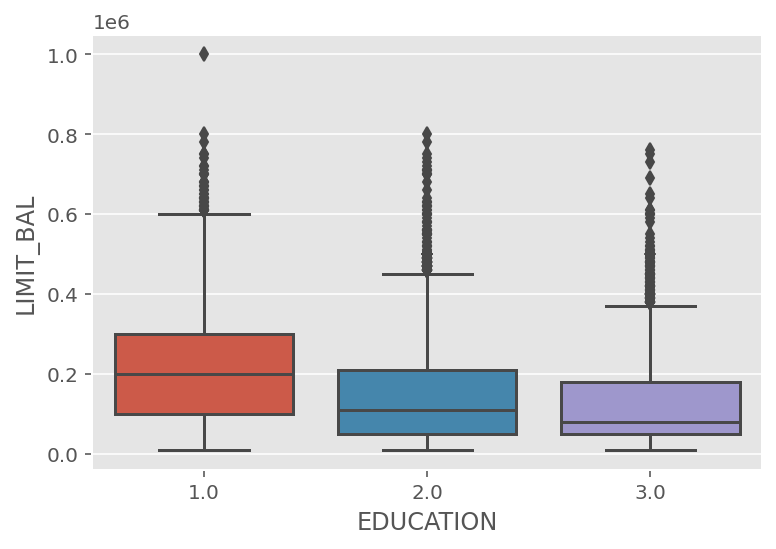

In [117]:
sns.boxplot(x="EDUCATION",y="LIMIT_BAL",data=df)

**Verificar condiciones para un ANOVA**

Independencia

Los grupos (variable categórica), dentro de cada grupo son independientes entre ellos ya que se han tomado desde el azar del negocio

Distribución normal de las observaciones

In [118]:
pg.normality(data=datos, dv="LIMIT_BAL",group="EDUCATION")

,W,pval,normal
2.00,0.88,0.00,False
1.00,0.95,0.00,False
3.00,0.84,0.00,False


**Test de Homocedasticidad**

In [119]:
pg.homoscedasticity(data=datos,dv="LIMIT_BAL",group="EDUCATION",method="levene")

,W,pval,equal_var
levene,168.10,0.00,False


**Test ANOVA**

In [120]:
pg.anova(data=datos,dv="LIMIT_BAL",between="EDUCATION",detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,EDUCATION,35975139372554.98,2,17987569686277.49,1148.68,0.00,0.07
1,Within,462405653843681.44,29529,15659373966.06,NaN,NaN,NaN


* Test es significativo

In [121]:
pg.pairwise_tukey(data=datos,dv="LIMIT_BAL",between="EDUCATION").round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,2.00,1.00,147062.44,212956.07,-65893.63,1611.06,-40.90,0.00,-0.53
1,2.00,3.00,147062.44,126550.27,20512.17,2073.86,9.89,0.00,0.16
2,1.00,3.00,212956.07,126550.27,86405.80,2159.66,40.01,0.00,0.69


* Las diferencias entre las Medias de par, son significativas porque el P valor de tukey es menor a 0,1

## **Categórica vs Categórica**

In [122]:
pd.crosstab(index=df.Mora,columns=df.EDUCATION)

EDUCATION,1.0,2.0,3.0
Mora,,,
0,8549,10700,3680
1,2036,3330,1237


In [123]:
pd.crosstab(index=df.Mora,columns=df.EDUCATION)

EDUCATION,1.0,2.0,3.0
Mora,,,
0,8549,10700,3680
1,2036,3330,1237


In [124]:
pd.crosstab(index=df.Mora,columns=df.EDUCATION,margins=True,normalize=True)

EDUCATION,1.0,2.0,3.0,All
Mora,,,,
0,0.29,0.36,0.12,0.78
1,0.07,0.11,0.04,0.22
All,0.36,0.48,0.17,1.00


**Test chi2 de independencia**

* H0: Las variables son Independientes
* Ha: las Variables son dependientes
* Si p valor es menor a 0,05, las variables estan relacionadas estadististicamente, en un posible modelo debe incluirse la variable

In [125]:
tc= pd.crosstab(index=df.Mora,columns=df.EDUCATION)

In [126]:
c,p,pchi,test = stats.chi2_contingency(tc)

In [127]:
p

8.645114142158601e-22

In [128]:
'{:f}'.format(p)

'0.000000'

# **4) Modelaciòn: Clasificaciòn**
## **4) Modelación**

Los términos inferencia y predicción describen tareas en las que aprendemos de los datos de manera supervisada para encontrar un modelo que describa la relación entre las variables independientes y el resultado. Sin embargo, la inferencia y la predicción divergen cuando se trata del uso del modelo resultante:

* Inferencia: use el modelo para aprender sobre el proceso de generación de datos.
* Predicción: utilice el modelo para predecir los resultados de nuevos puntos de datos
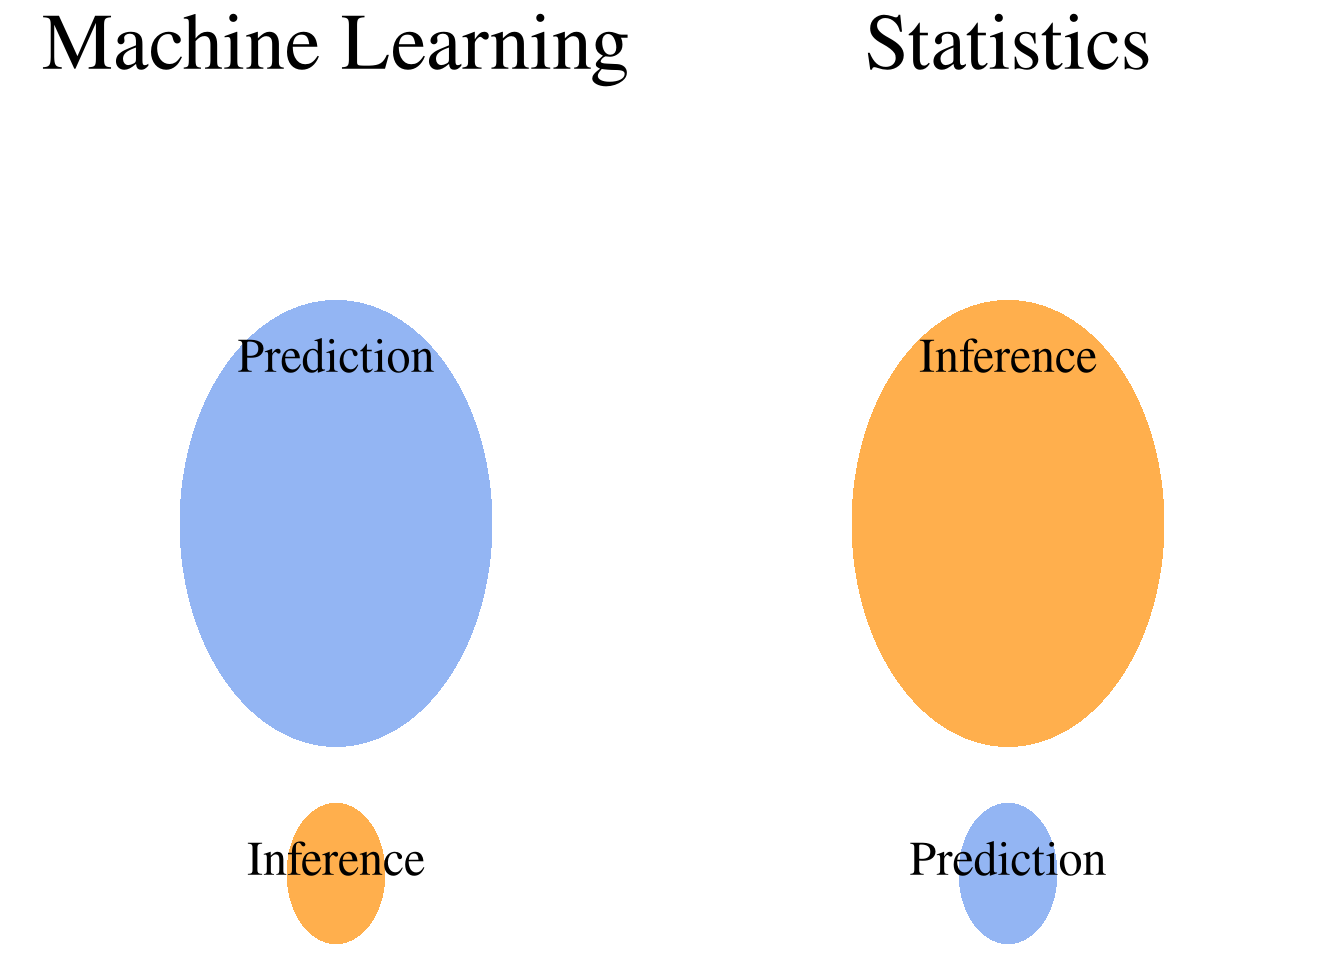

**Flujos de trabajo para inferencia y predicción**

Los flujos de trabajo básicos para la inferencia y la predicción se describen en las siguientes secciones.

**Inferencia**

* Modelado: Razonar sobre el proceso de generación de datos y elegir el modelo estocástico que mejor se aproxime al proceso de generación de datos.
* Validación del modelo: evalúe la validez del modelo estocástico mediante análisis de residuos o pruebas de bondad de ajuste.
* Inferencia: utilice el modelo estocástico para comprender el proceso de generación de datos.

**Predicción**

* Modelado: considere varios modelos diferentes y diferentes configuraciones de parámetros.
* Selección de modelo: identifique el modelo con el mayor rendimiento predictivo utilizando conjuntos de validación / prueba; seleccione el modelo con el rendimiento más alto en el equipo de prueba.
* Predicción: aplique el modelo seleccionado en datos nuevos con la expectativa de que el modelo seleccionado también se generalice a los datos no vistos.

## **4.1 Desbalanceo**

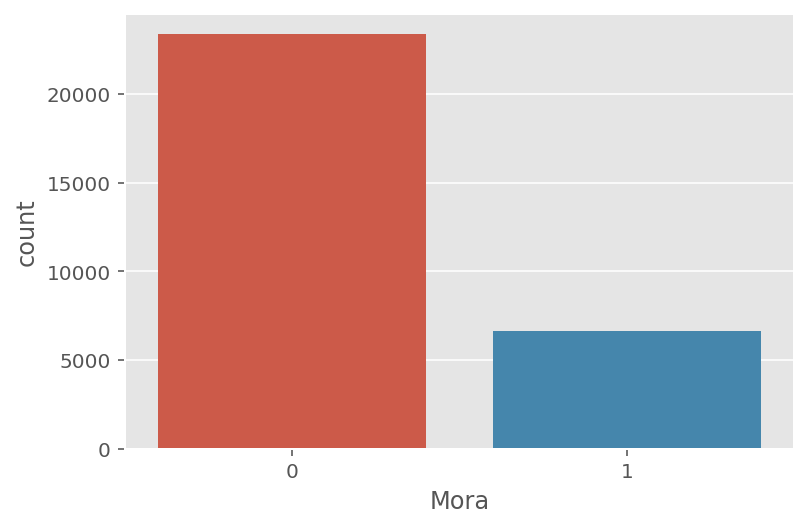

In [129]:
sns.countplot("Mora",data=df)

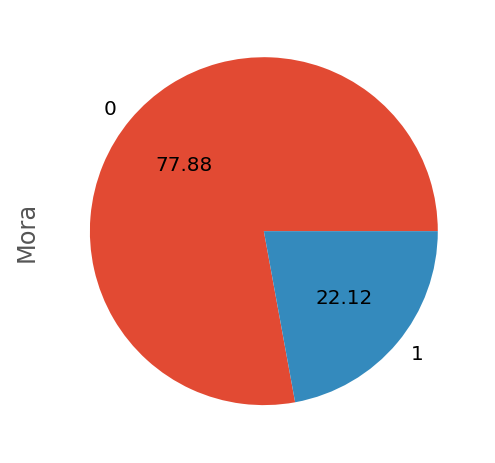

In [130]:
df.Mora.value_counts().plot(kind="pie",autopct="%.2f")

Tener Modelos Sesgados hacia la clase Mayoritaria, muy bueno para predecir los clientes con Buen comportamiento de Pago, pero muy con malas predicciones para los clientes Morosos

##**4.2 Seleccion de Variables**

In [131]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Mora'],
      dtype='object')

In [132]:
VariablesNumericas

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [133]:
VariablesCategoricas

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'Mora']

**Funcion para X**

In [134]:
def TablaX(df,VariablesNumericas,VariablesCategoricas):
  datos=df

  if VariablesCategoricas != [] :
    datos_dummies=pd.get_dummies(datos[VariablesCategoricas],drop_first=True)
    X=pd.concat([datos_dummies,datos[VariablesNumericas]],axis=1,sort=False)
  else:
    X=datos[VariablesNumericas].apply
  return X

In [135]:
Y=df.Mora

In [136]:
X=TablaX(df,VariablesNumericas,VariablesCategoricas)

In [137]:
X.shape

(30000, 78)

## **4.3 Divisiòn Train y Test**
Evaluar la capacidad predictiva de un modelo consiste en comprobar aproxima sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test.

Es importante verificar que la distribución de la variable respuesta es similar en el conjunto de entrenamiento y en el de test. Para asegurar que esto se cumple, la función train_test_split() de scikit-learn permite, en problemas de clasificación, identificar con el argumento stratify la variable en base a la cual hacer el reparto.

Este tipo de reparto estratificado asegura que el conjunto de entrenamiento y el de test sean similares en cuanto a la variable respuesta, sin embargo, no garantiza que ocurra lo mismo con los predictores.



In [138]:
from sklearn.model_selection import  train_test_split

In [139]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=123,stratify=Y)

In [140]:
print(x_train.shape)

(21000, 78)


In [141]:
print(len(y_test))

9000


In [142]:
y_train.value_counts()/len(y_train)

0   0.78
1   0.22
Name: Mora, dtype: float64

In [143]:
y_test.value_counts()/len(y_test)

0   0.78
1   0.22
Name: Mora, dtype: float64

## **4.4 Modelo Logit**

La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama regresión logística simple cuando solo hay una variable independiente y regresión logística múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

In [144]:
from sklearn.linear_model import  LogisticRegression
import statsmodels.api as sm

In [145]:
x_train.shape

(21000, 78)

In [146]:
Modelo_Regresion_Logistica_Sklearn= LogisticRegression(C=1e42,random_state=0).fit(x_train,y_train)

**Coeficientes**

In [147]:
coefs= pd.DataFrame(Modelo_Regresion_Logistica_Sklearn.coef_,
                    columns=x_train.columns)
coe=coefs.transpose()

In [148]:
coe

,0
SEX_2,-0.00
EDUCATION_2.0,-0.00
EDUCATION_3.0,-0.00
MARRIAGE_2.0,-0.00
MARRIAGE_3.0,-0.00
...,...
PAY_AMT2,-0.00
PAY_AMT3,-0.00
PAY_AMT4,-0.00
PAY_AMT5,-0.00


**Error Train**

In [149]:
Probabilidad_Modelo1=Modelo_Regresion_Logistica_Sklearn.predict_proba(x_train)

In [150]:
Probabilidad_Modelo1

array([[0.54903304, 0.45096696],
       [0.79672787, 0.20327213],
       [0.87400049, 0.12599951],
       ...,
       [0.61994645, 0.38005355],
       [0.85210846, 0.14789154],
       [0.994725  , 0.005275  ]])

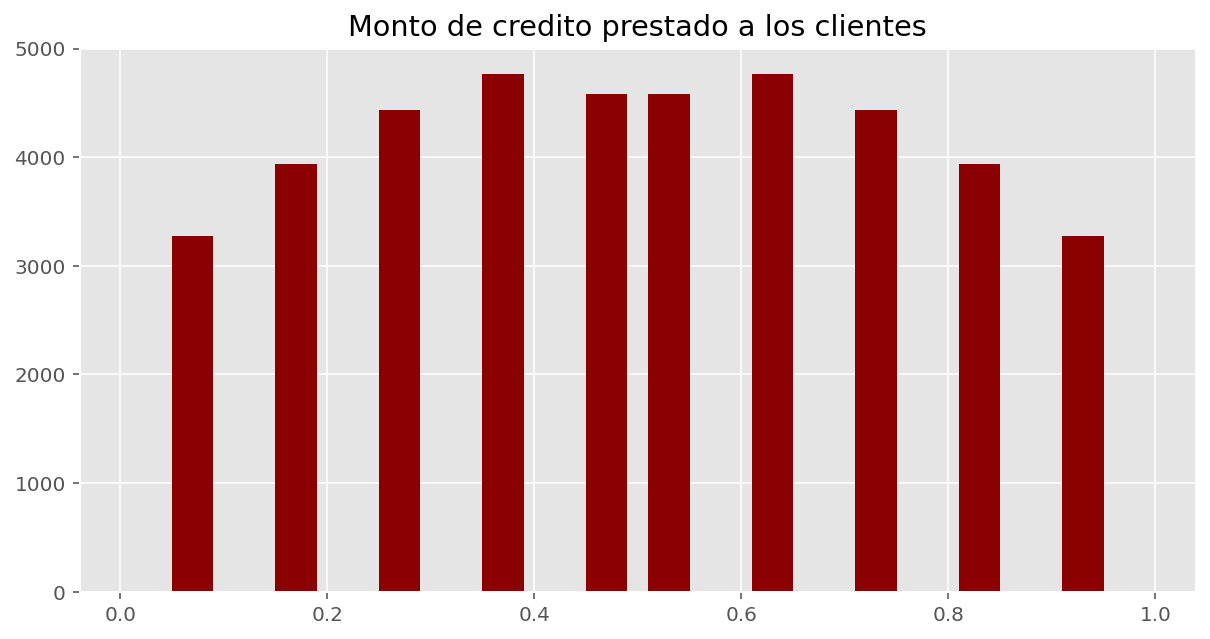

In [151]:
plt.figure(figsize=(10,5))
plt.hist(Probabilidad_Modelo1,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()

In [152]:
Prediccion_Modelo1=Modelo_Regresion_Logistica_Sklearn.predict(x_train)

In [153]:
Prediccion_Modelo1

array([0, 0, 0, ..., 0, 0, 0])

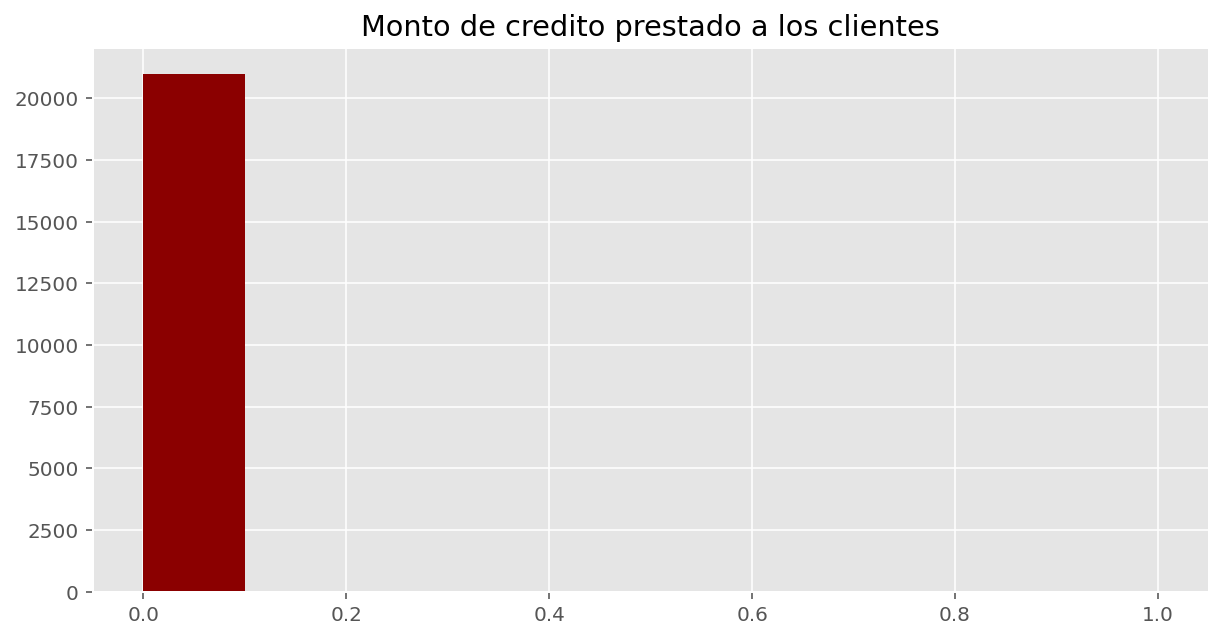

In [154]:
plt.figure(figsize=(10,5))
plt.hist(Prediccion_Modelo1,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()

In [155]:
Prediccion_Modelo1

array([0, 0, 0, ..., 0, 0, 0])

In [156]:
y_train

14451    0
18392    1
24955    0
7162     0
12125    0
        ..
27165    0
3228     0
23477    1
22177    1
13416    0
Name: Mora, Length: 21000, dtype: category
Categories (2, int64): [0, 1]

In [157]:
y_train.value_counts()

0    16355
1     4645
Name: Mora, dtype: int64

**Matriz de Confusión**

In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
confusion_matrix(y_train,Prediccion_Modelo1)

array([[16350,     5],
       [ 4642,     3]])

**Otra forma**

In [160]:
data={"y_Actual":y_train,
      "y_Predicted": Prediccion_Modelo1}
dt= pd.DataFrame(data,columns=["y_Actual","y_Predicted"])

In [161]:
matrix_confusion= pd.crosstab(dt.y_Actual,dt.y_Predicted,rownames=["Actual"],colnames=["Predicted"])

In [162]:
matrix_confusion

Predicted,0,1
Actual,,
0,16350,5
1,4642,3


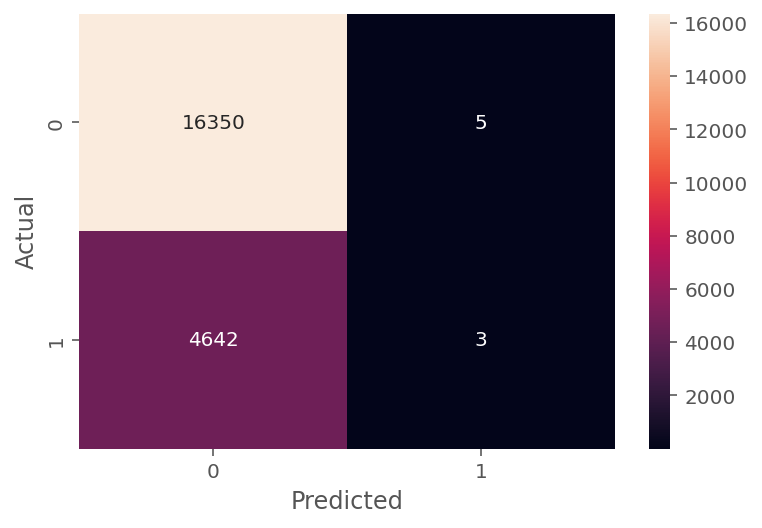

In [163]:
sns.heatmap(matrix_confusion,annot=True,fmt='g')
plt.show()

**Matrix Normalizada**

In [164]:
matrix_confusion_normalizada= matrix_confusion.astype("float")/ matrix_confusion.sum(axis=1)[:,np.newaxis]

In [165]:
matrix_confusion_normalizada

Predicted,0,1
Actual,,
0,1.00,0.00
1,1.00,0.00


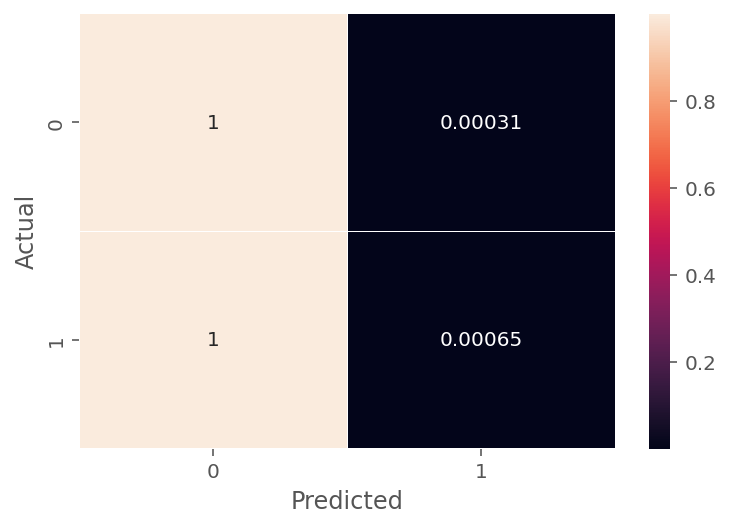

In [166]:
sns.heatmap(matrix_confusion_normalizada, annot=True,linewidths = 0.01)
plt.show()

In [167]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import  metrics

In [168]:
Accuracy_Train_Modelo1=accuracy_score(y_train,Prediccion_Modelo1)
print(Accuracy_Train_Modelo1)

0.7787142857142857


In [169]:
Reporte_Train= metrics.classification_report(y_train,Prediccion_Modelo1)
print(Reporte_Train)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     16355
           1       0.38      0.00      0.00      4645

    accuracy                           0.78     21000
   macro avg       0.58      0.50      0.44     21000
weighted avg       0.69      0.78      0.68     21000



In [170]:
precision, recall, fscore, support = score(y_train,Prediccion_Modelo1)
f1_Score_M1_0=fscore[0]
f1_Score_M1_1=fscore[1]

In [171]:
f1_Score_M1_0

0.8755723351273195

In [172]:
f1_Score_M1_1

0.0012894906511927786

**Error Test**

In [173]:
Prediccion_Modelo1_test=Modelo_Regresion_Logistica_Sklearn.predict(x_test)

In [174]:
Probabilidad_Modelo1_test=Modelo_Regresion_Logistica_Sklearn.predict_proba(x_test)

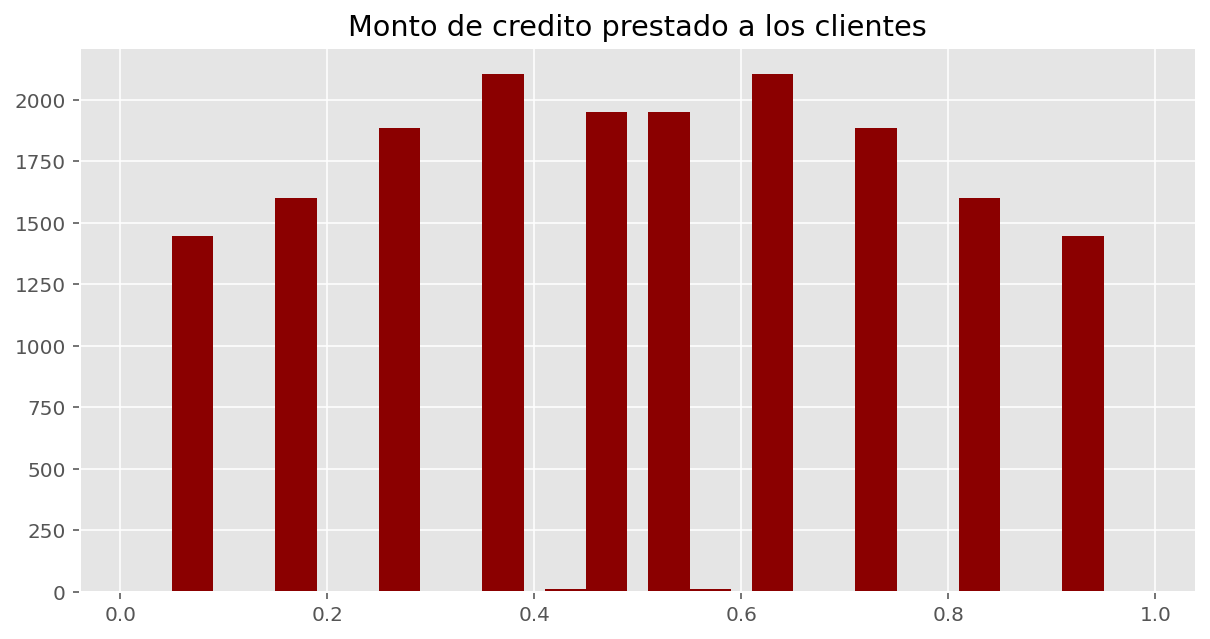

In [175]:
plt.figure(figsize=(10,5))
plt.hist(Probabilidad_Modelo1_test,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()

In [176]:
data={"y_Actual":y_test,
      "y_Predicted": Prediccion_Modelo1_test}
dt= pd.DataFrame(data,columns=["y_Actual","y_Predicted"])
matrix_confusion= pd.crosstab(dt.y_Actual,dt.y_Predicted,rownames=["Actual"],colnames=["Predicted"])
matrix_confusion

Predicted,0,1
Actual,,
0,7001,8
1,1987,4


In [177]:
Accuracy_Test_Modelo1=accuracy_score(y_test,Prediccion_Modelo1_test)
print(Accuracy_Test_Modelo1)

0.7783333333333333


In [178]:
Reporte_Test_M1= metrics.classification_report(y_test,Prediccion_Modelo1_test)
print(Reporte_Test_M1)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.33      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.56      0.50      0.44      9000
weighted avg       0.68      0.78      0.68      9000



In [179]:
precision, recall, fscore, support = score(y_test,Prediccion_Modelo1_test)
f1_Score_M1_0_test=fscore[0]
f1_Score_M1_1_test=fscore[1]

**Curva ROC**

In [180]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [181]:
Probabilidad_Modelo1_test

array([[0.75340193, 0.24659807],
       [0.9491061 , 0.0508939 ],
       [0.62479751, 0.37520249],
       ...,
       [0.63135097, 0.36864903],
       [0.57403884, 0.42596116],
       [0.53862093, 0.46137907]])

In [182]:
Probabilidad_Modelo1_test[::,1:2]

array([[0.24659807],
       [0.0508939 ],
       [0.37520249],
       ...,
       [0.36864903],
       [0.42596116],
       [0.46137907]])

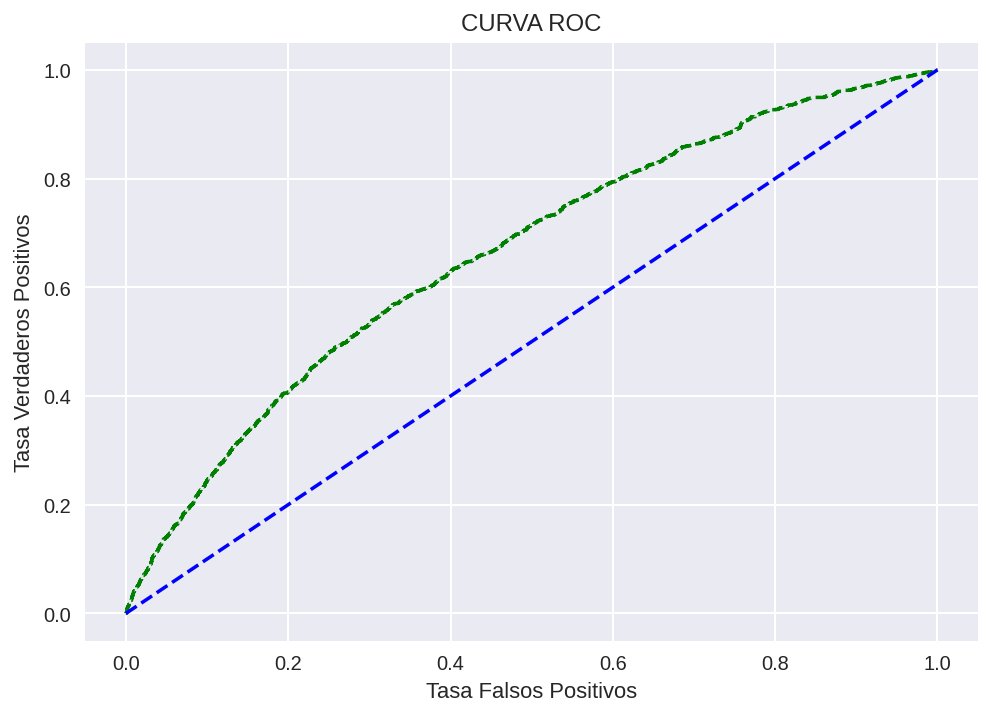

In [183]:
## Diagonal
fpr, tpr, thresholds = roc_curve(y_test, Probabilidad_Modelo1_test[::,1:2])
AUC1=roc_auc_score(y_test, Probabilidad_Modelo1_test[::,1:2])
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle="--",color="green",label="Regresion Logit1")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("CURVA ROC")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa Verdaderos Positivos")
plt.show()

##**4.5)Modelo Logit Validando supuesto**

* Agregar una constante 1 a las X train

In [184]:
x_train1=sm.add_constant(x_train,prepend=True)
x_test1=sm.add_constant(x_test,prepend=True)

In [185]:
Modelogit2=sm.Logit(endog=y_train,exog=x_train1).fit(method="bfgs")

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


In [186]:
Modelogit2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: -0.312    
Dependent Variable: Mora             AIC:              29264.1816
Date:               2022-06-02 00:40 BIC:              29868.5547
No. Observations:   21000            Log-Likelihood:   -14556.   
Df Model:           75               LL-Null:          -11097.   
Df Residuals:       20924            LLR p-value:      1.0000    
Converged:          0.0000           Scale:            1.0000    
-------------------------------------------------------------------
                  Coef.    Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------
const             0.0000        nan   nan     nan      nan      nan
SEX_2             0.0000        nan   nan     nan      nan      nan
EDUCATION_2.0     0.0000        nan   nan     nan      nan      nan
EDUCATION_3.0     0.0000        nan   nan     nan      nan      nan
MARRIAGE_2.0      0.0000        nan   nan     nan      nan      nan
MARRIAGE_3.0      0.0000        nan   nan     nan      nan      nan
PAY_0_-1          0.0000        nan   nan     nan      nan      nan
PAY_0_0           0.0000        nan   nan     nan      nan      nan
PAY_0_1           0.0000        nan   nan     nan      nan      nan
PAY_0_2           0.0000        nan   nan     nan      nan      nan
PAY_0_3           0.0000        nan   nan     nan      nan      nan
PAY_0_4           0.0000        nan   nan     nan      nan      nan
PAY_0_5           0.0000        nan   nan     nan      nan      nan
PAY_0_6           0.0000        nan   nan     nan      nan      nan
PAY_0_7           0.0000        nan   nan     nan      nan      nan
PAY_0_8           0.0000        nan   nan     nan      nan      nan
PAY_2_-1          0.0000        nan   nan     nan      nan      nan
PAY_2_0           0.0000        nan   nan     nan      nan      nan
PAY_2_1           0.0000        nan   nan     nan      nan      nan
PAY_2_2           0.0000        nan   nan     nan      nan      nan
PAY_2_3           0.0000        nan   nan     nan      nan      nan
PAY_2_4           0.0000        nan   nan     nan      nan      nan
PAY_2_5           0.0000        nan   nan     nan      nan      nan
PAY_2_6           0.0000        nan   nan     nan      nan      nan
PAY_2_7           0.0000        nan   nan     nan      nan      nan
PAY_2_8           0.0000        nan   nan     nan      nan      nan
PAY_3_-1          0.0000        nan   nan     nan      nan      nan
PAY_3_0           0.0000        nan   nan     nan      nan      nan
PAY_3_1           0.0000        nan   nan     nan      nan      nan
PAY_3_2           0.0000        nan   nan     nan      nan      nan
PAY_3_3           0.0000        nan   nan     nan      nan      nan
PAY_3_4           0.0000        nan   nan     nan      nan      nan
PAY_3_5           0.0000        nan   nan     nan      nan      nan
PAY_3_6           0.0000        nan   nan     nan      nan      nan
PAY_3_7           0.0000        nan   nan     nan      nan      nan
PAY_3_8           0.0000        nan   nan     nan      nan      nan
PAY_4_-1          0.0000        nan   nan     nan      nan      nan
PAY_4_0           0.0000        nan   nan     nan      nan      nan
PAY_4_1           0.0000        nan   nan     nan      nan      nan
PAY_4_2           0.0000        nan   nan     nan      nan      nan
PAY_4_3           0.0000        nan   nan     nan      nan      nan
PAY_4_4           0.0000        nan   nan     nan      nan      nan
PAY_4_5           0.0000        nan   nan     nan      nan      nan
PAY_4_6           0.0000        nan   nan     nan      nan      nan
PAY_4_7           0.0000        nan   nan     nan      nan      nan
PAY_4_8           0.0000        nan   nan     nan      nan      nan
PAY_5_-1          0.0000        nan   nan     nan  

**Seleccion de Variables**

**Correlaciones entre Numericas**

In [187]:
Matrix_Correlacion=df[VariablesNumericas].corr()

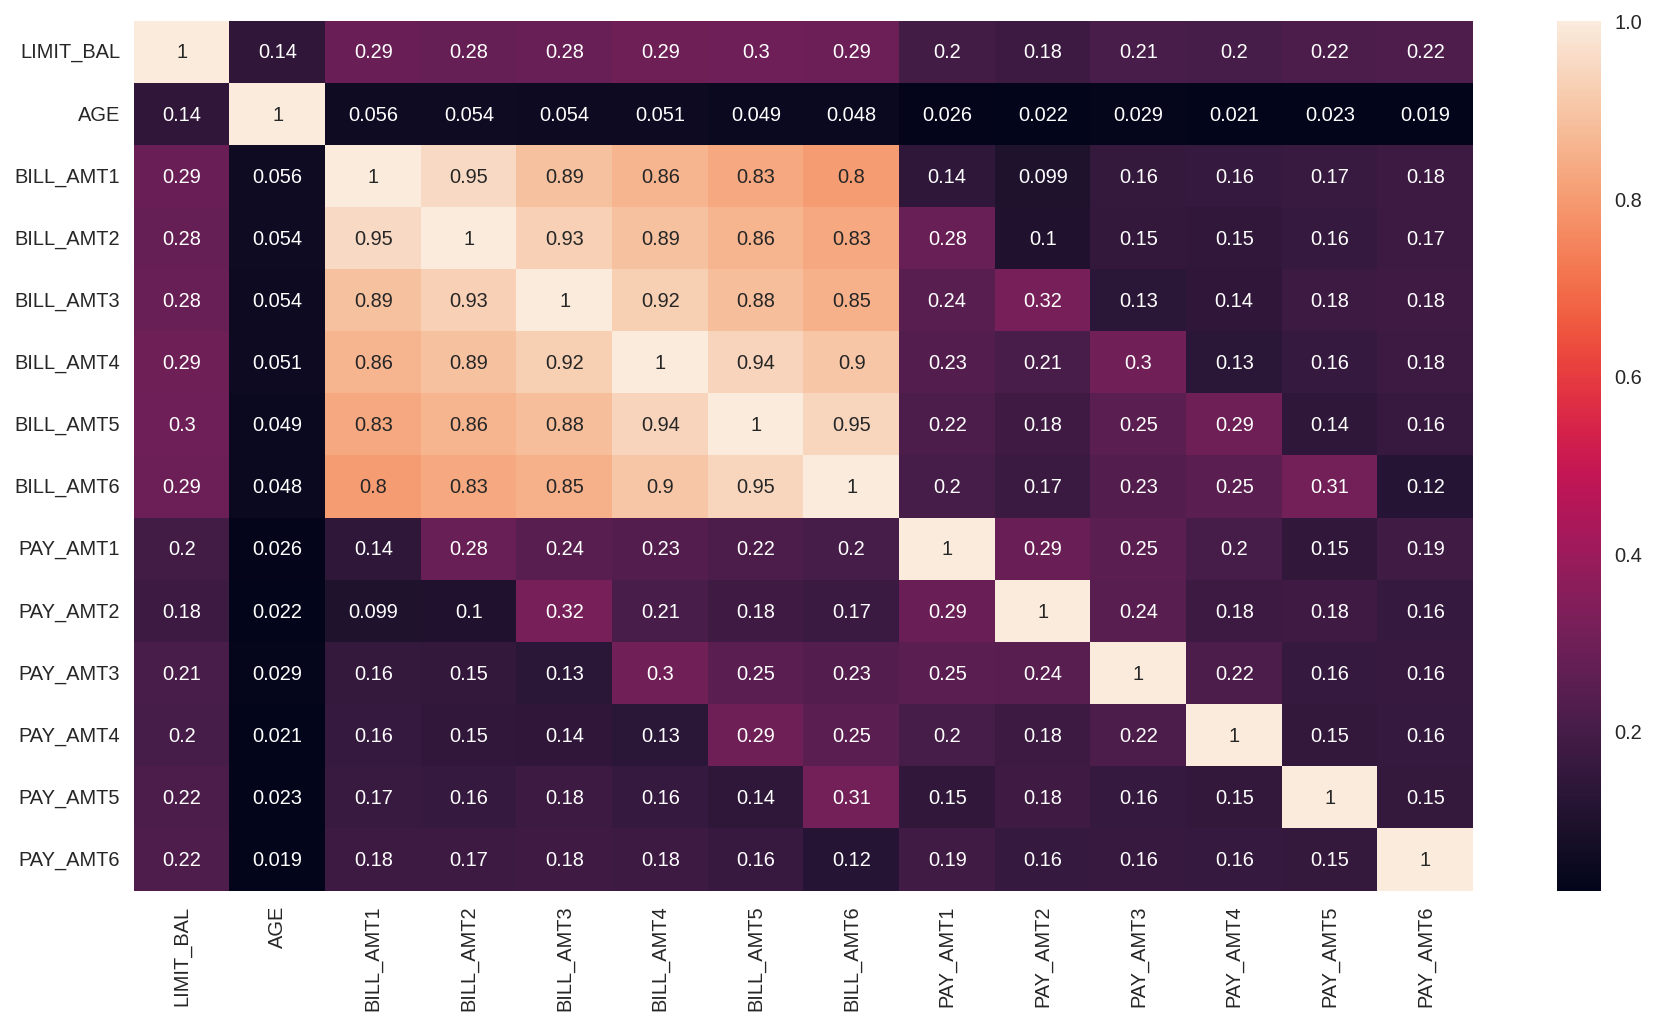

In [188]:
## Garica que nos ayude
fig, ax= plt.subplots(figsize=(15,8))
sns.heatmap(Matrix_Correlacion, annot=True)
plt.show()

* Dejamos un solo Bill

In [189]:
variablesEliminar=["BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
X_train2=x_train1.drop(variablesEliminar,axis=1)

In [190]:
Modelogit3=sm.Logit(endog=y_train,exog=X_train2).fit(method="bfgs")

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


In [191]:
Modelogit3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: -0.312    
Dependent Variable: Mora             AIC:              29254.1816
Date:               2022-06-02 00:46 BIC:              29818.7933
No. Observations:   21000            Log-Likelihood:   -14556.   
Df Model:           70               LL-Null:          -11097.   
Df Residuals:       20929            LLR p-value:      1.0000    
Converged:          0.0000           Scale:            1.0000    
-------------------------------------------------------------------
                  Coef.    Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------
const             0.0000        nan   nan     nan      nan      nan
SEX_2             0.0000        nan   nan     nan      nan      nan
EDUCATION_2.0     0.0000        nan   nan     nan      nan      nan
EDUCATION_3.0     0.0000        nan   nan     nan      nan      nan
MARRIAGE_2.0      0.0000        nan   nan     nan      nan      nan
MARRIAGE_3.0      0.0000        nan   nan     nan      nan      nan
PAY_0_-1          0.0000        nan   nan     nan      nan      nan
PAY_0_0           0.0000        nan   nan     nan      nan      nan
PAY_0_1           0.0000        nan   nan     nan      nan      nan
PAY_0_2           0.0000        nan   nan     nan      nan      nan
PAY_0_3           0.0000        nan   nan     nan      nan      nan
PAY_0_4           0.0000        nan   nan     nan      nan      nan
PAY_0_5           0.0000        nan   nan     nan      nan      nan
PAY_0_6           0.0000        nan   nan     nan      nan      nan
PAY_0_7           0.0000        nan   nan     nan      nan      nan
PAY_0_8           0.0000        nan   nan     nan      nan      nan
PAY_2_-1          0.0000        nan   nan     nan      nan      nan
PAY_2_0           0.0000        nan   nan     nan      nan      nan
PAY_2_1           0.0000        nan   nan     nan      nan      nan
PAY_2_2           0.0000        nan   nan     nan      nan      nan
PAY_2_3           0.0000        nan   nan     nan      nan      nan
PAY_2_4           0.0000        nan   nan     nan      nan      nan
PAY_2_5           0.0000        nan   nan     nan      nan      nan
PAY_2_6           0.0000        nan   nan     nan      nan      nan
PAY_2_7           0.0000        nan   nan     nan      nan      nan
PAY_2_8           0.0000        nan   nan     nan      nan      nan
PAY_3_-1          0.0000        nan   nan     nan      nan      nan
PAY_3_0           0.0000        nan   nan     nan      nan      nan
PAY_3_1           0.0000        nan   nan     nan      nan      nan
PAY_3_2           0.0000        nan   nan     nan      nan      nan
PAY_3_3           0.0000        nan   nan     nan      nan      nan
PAY_3_4           0.0000        nan   nan     nan      nan      nan
PAY_3_5           0.0000        nan   nan     nan      nan      nan
PAY_3_6           0.0000        nan   nan     nan      nan      nan
PAY_3_7           0.0000        nan   nan     nan      nan      nan
PAY_3_8           0.0000        nan   nan     nan      nan      nan
PAY_4_-1          0.0000        nan   nan     nan      nan      nan
PAY_4_0           0.0000        nan   nan     nan      nan      nan
PAY_4_1           0.0000        nan   nan     nan      nan      nan
PAY_4_2           0.0000        nan   nan     nan      nan      nan
PAY_4_3           0.0000        nan   nan     nan      nan      nan
PAY_4_4           0.0000        nan   nan     nan      nan      nan
PAY_4_5           0.0000        nan   nan     nan      nan      nan
PAY_4_6           0.0000        nan   nan     nan      nan      nan
PAY_4_7           0.0000        nan   nan     nan      nan      nan
PAY_4_8           0.0000        nan   nan     nan      nan      nan
PAY_5_-1          0.0000        nan   nan     nan  

In [192]:
X_train2.shape

(21000, 74)

**VIF**

In [193]:
x=X_train2.drop(["const"],axis=1)

In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [195]:
tabla_vif=pd.DataFrame()
tabla_vif["Variables"]=x.columns
tabla_vif["VIF"]=[ variance_inflation_factor (x.values,i)
for i in range(len(x.columns))]

In [196]:
pd.set_option("display.max_rows", None)

In [197]:
tabla_vif['VIF'] =tabla_vif['VIF'].replace(np.nan, 100)

In [198]:
tabla_vif

,Variables,VIF
0,SEX_2,2.37
1,EDUCATION_2.0,2.44
2,EDUCATION_3.0,1.67
3,MARRIAGE_2.0,2.08
4,MARRIAGE_3.0,1.04
5,PAY_0_-1,9.30
6,PAY_0_0,28.74
7,PAY_0_1,3.65
8,PAY_0_2,4.73
9,PAY_0_3,1.59


In [199]:
EliminarVif=tabla_vif.Variables[tabla_vif.VIF>4].to_list()

In [200]:
EliminarVif

['PAY_0_-1',
 'PAY_0_0',
 'PAY_0_2',
 'PAY_0_7',
 'PAY_0_8',
 'PAY_2_-1',
 'PAY_2_0',
 'PAY_2_2',
 'PAY_2_6',
 'PAY_2_7',
 'PAY_2_8',
 'PAY_3_-1',
 'PAY_3_0',
 'PAY_3_2',
 'PAY_3_6',
 'PAY_4_-1',
 'PAY_4_0',
 'PAY_4_2',
 'PAY_4_5',
 'PAY_4_7',
 'PAY_4_8',
 'PAY_5_-1',
 'PAY_5_0',
 'PAY_5_2',
 'PAY_5_6',
 'PAY_5_7',
 'PAY_5_8',
 'PAY_6_-1',
 'PAY_6_0',
 'PAY_6_2',
 'PAY_6_6',
 'PAY_6_7',
 'PAY_6_8',
 'AGE']

* Numericas > 4
* Factor >2

In [201]:
X_train3=X_train2.drop(EliminarVif,axis=1)

In [202]:
X_train3.shape

(21000, 40)

In [203]:
X_train3.head(2)

,const,SEX_2,EDUCATION_2.0,EDUCATION_3.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_1,PAY_0_3,PAY_0_4,PAY_0_5,...,PAY_6_5,Mora_1,LIMIT_BAL,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
14451,1.00,0,0,1,0,0,0,0,0,0,...,0,0,20000.00,2912.00,390.00,780.00,780.00,780.00,390.00,780.00
18392,1.00,1,1,0,1,0,0,0,0,0,...,0,1,230000.00,160.00,237.00,586.00,12511.00,1249.00,0.00,0.00


In [204]:
Modelogit4=sm.Logit(endog=y_train,exog=X_train3).fit(method="bfgs")
Modelogit4.summary2()

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: -0.312    
Dependent Variable: Mora             AIC:              29192.1816
Date:               2022-06-02 00:50 BIC:              29510.2727
No. Observations:   21000            Log-Likelihood:   -14556.   
Df Model:           39               LL-Null:          -11097.   
Df Residuals:       20960            LLR p-value:      1.0000    
Converged:          0.0000           Scale:            1.0000    
------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
const            0.0000    0.0447  0.0000  1.0000  -0.0877  0.0877
SEX_2            0.0000    0.0283  0.0000  1.0000  -0.0555  0.0555
EDUCATION_2.0    0.0000    0.0319  0.0000  1.0000  -0.0625  0.0625
EDUCATION_3.0    0.0000    0.0430  0.0000  1.0000  -0.0842  0.0842
MARRIAGE_2.0     0.0000    0.0286  0.0000  1.0000  -0.0561  0.0561
MARRIAGE_3.0     0.0000    0.1307  0.0000  1.0000  -0.2561  0.2561
PAY_0_1          0.0000    0.0433  0.0000  1.0000  -0.0849  0.0849
PAY_0_3          0.0000    0.1384  0.0000  1.0000  -0.2713  0.2713
PAY_0_4          0.0000    0.3040  0.0000  1.0000  -0.5959  0.5959
PAY_0_5          0.0000    0.5581  0.0000  1.0000  -1.0938  1.0938
PAY_0_6          0.0000    1.0042  0.0000  1.0000  -1.9683  1.9683
PAY_2_1          0.0000    0.4380  0.0000  1.0000  -0.8584  0.8584
PAY_2_3          0.0000    0.1458  0.0000  1.0000  -0.2858  0.2858
PAY_2_4          0.0000    0.3330  0.0000  1.0000  -0.6526  0.6526
PAY_2_5          0.0000    0.7589  0.0000  1.0000  -1.4875  1.4875
PAY_3_1          0.0000    1.9711  0.0000  1.0000  -3.8633  3.8633
PAY_3_3          0.0000    0.1932  0.0000  1.0000  -0.3787  0.3787
PAY_3_4          0.0000    0.4314  0.0000  1.0000  -0.8456  0.8456
PAY_3_5          0.0000    0.6089  0.0000  1.0000  -1.1935  1.1935
PAY_3_7          0.0000    0.4184  0.0000  1.0000  -0.8200  0.8200
PAY_3_8          0.0000    1.2105  0.0000  1.0000  -2.3726  2.3726
PAY_4_1          0.0000    2.7883  0.0000  1.0000  -5.4649  5.4649
PAY_4_3          0.0000    0.2154  0.0000  1.0000  -0.4221  0.4221
PAY_4_4          0.0000    0.4184  0.0000  1.0000  -0.8200  0.8200
PAY_4_6          0.0000    2.1335  0.0000  1.0000  -4.1815  4.1815
PAY_5_3          0.0000    0.2070  0.0000  1.0000  -0.4056  0.4056
PAY_5_4          0.0000    0.3481  0.0000  1.0000  -0.6823  0.6823
PAY_5_5          0.0000    0.7929  0.0000  1.0000  -1.5540  1.5540
PAY_6_3          0.0000    0.2169  0.0000  1.0000  -0.4251  0.4251
PAY_6_4          0.0000    0.4569  0.0000  1.0000  -0.8954  0.8954
PAY_6_5          0.0000    0.6404  0.0000  1.0000  -1.2551  1.2551
Mora_1           0.0000    0.0345  0.0000  1.0000  -0.0676  0.0676
LIMIT_BAL        0.0000    0.0000  0.0000  1.0000  -0.0000  0.0000
BILL_AMT1        0.0000    0.0000  0.0000  1.0000  -0.0000  0.0000
PAY_AMT1         0.0000    0.0000  0.0000  1.0000  -0.0000  0.0000
PAY_AMT2         0.0000    0.0000  0.0000  1.0000  -0.0000  0.0000
PAY_AMT3         0.0000    0.0000  0.0000  1.0000  -0.0000  0.0000
PAY_AMT4         0.0000    0.0000  0.0000  1.0000  -0.0000  0.0000
PAY_AMT5         0.0000    0.0000  0.0000  1.0000  -0.0000  0.0000
PAY_AMT6         0.0000    0.0000  0.0000  1.0000  -0.0000  0.0000
=================================================================

"""

In [205]:
x=X_train3

In [206]:
tabla_vif=pd.DataFrame()
tabla_vif["Variables"]=x.columns
tabla_vif["VIF"]=[ variance_inflation_factor (x.values,i)
for i in range(len(x.columns))]
tabla_vif

,Variables,VIF
0,const,10.51
1,SEX_2,1.01
2,EDUCATION_2.0,1.33
3,EDUCATION_3.0,1.33
4,MARRIAGE_2.0,1.07
5,MARRIAGE_3.0,1.02
6,PAY_0_1,1.06
7,PAY_0_3,1.08
8,PAY_0_4,1.24
9,PAY_0_5,1.32


**Seleccion De Variables por Test**

Selección univariante Las pruebas estadísticas se pueden utilizar para seleccionar aquellas características que tienen la relación más fuerte con la variable de salida. La biblioteca scikit-learn proporciona la clase SelectKBest que se puede usar con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características.

In [207]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif,mutual_info_classif

In [208]:
X_Select=X_train3.drop(["const"],axis=1)
X_Select.shape[1]
Mejores_Variables=SelectKBest(score_func=mutual_info_classif,k=X_Select.shape[1])
fit=Mejores_Variables.fit(X_Select,y_train)
Puntajes=pd.DataFrame(fit.scores_)
Columnas=pd.DataFrame(X_Select.columns)
df_completo=pd.concat([Columnas,Puntajes],axis=1)
df_completo.columns=["Variable","Puntaje"]
df_completo=df_completo.nlargest(8,"Puntaje")

In [209]:
df_completo

,Variable,Puntaje
30,Mora_1,0.53
33,PAY_AMT1,0.02
35,PAY_AMT3,0.02
36,PAY_AMT4,0.02
31,LIMIT_BAL,0.02
34,PAY_AMT2,0.02
37,PAY_AMT5,0.01
38,PAY_AMT6,0.01


In [210]:
Variables1=df_completo["Variable"].to_list()
Variables1

['Mora_1',
 'PAY_AMT1',
 'PAY_AMT3',
 'PAY_AMT4',
 'LIMIT_BAL',
 'PAY_AMT2',
 'PAY_AMT5',
 'PAY_AMT6']

In [211]:
x_train_Seleccion_V=x_train[Variables1]
x_test_Seleccion_V=x_test[Variables1]
x_train_1=sm.add_constant(x_train_Seleccion_V,prepend=True)
x_test_1=sm.add_constant(x_test_Seleccion_V,prepend=True)

In [212]:
Modelogit5=sm.Logit(endog=y_train,exog=x_train_1).fit(method="bfgs")
Modelogit5.summary2()

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: -0.312    
Dependent Variable: Mora             AIC:              29130.1816
Date:               2022-06-02 00:52 BIC:              29201.7521
No. Observations:   21000            Log-Likelihood:   -14556.   
Df Model:           8                LL-Null:          -11097.   
Df Residuals:       20991            LLR p-value:      1.0000    
Converged:          0.0000           Scale:            1.0000    
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
const        0.0000     0.0248   0.0000   1.0000   -0.0486   0.0486
Mora_1       0.0000     0.0337   0.0000   1.0000   -0.0660   0.0660
PAY_AMT1     0.0000     0.0000   0.0000   1.0000   -0.0000   0.0000
PAY_AMT3     0.0000     0.0000   0.0000   1.0000   -0.0000   0.0000
PAY_AMT4     0.0000     0.0000   0.0000   1.0000   -0.0000   0.0000
LIMIT_BAL    0.0000     0.0000   0.0000   1.0000   -0.0000   0.0000
PAY_AMT2     0.0000     0.0000   0.0000   1.0000   -0.0000   0.0000
PAY_AMT5     0.0000     0.0000   0.0000   1.0000   -0.0000   0.0000
PAY_AMT6     0.0000     0.0000   0.0000   1.0000   -0.0000   0.0000
=================================================================

"""

**Significancia Estadistica**

P valor deben ser menores a 0.05
9 Variables no son Significativas
Sobre Identificacion del Modelo

**Evaluar Todas Las Variables**

In [213]:
X_Select=x_train
X_Select.shape[1]
Mejores_Variables=SelectKBest(score_func=mutual_info_classif,k=X_Select.shape[1])
fit=Mejores_Variables.fit(X_Select,y_train)
Puntajes=pd.DataFrame(fit.scores_)
Columnas=pd.DataFrame(X_Select.columns)
df_completo=pd.concat([Columnas,Puntajes],axis=1)
df_completo.columns=["Variable","Puntaje"]
df_completo=df_completo.nlargest(15,"Puntaje")

In [214]:
df_completo

,Variable,Puntaje
63,Mora_1,0.53
8,PAY_0_2,0.05
28,PAY_3_2,0.04
18,PAY_2_2,0.04
38,PAY_4_2,0.03
6,PAY_0_0,0.03
56,PAY_6_2,0.02
47,PAY_5_2,0.02
75,PAY_AMT4,0.02
72,PAY_AMT1,0.02


**Modelo Base**

In [215]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [216]:
ModeloBaseRL=LogisticRegression(penalty="none")
#ModeloBaseRL.fit(x_train,y_train)

**Modelo Eliminacion Forwar**

In [217]:
#sfs=SequentialFeatureSelector(ModeloBaseRL,direction="forward") ### backward
#sfs.fit(x_train,y_train)

In [218]:
#sfs.get_feature_names_out()

In [219]:
x_train.columns

Index(['SEX_2', 'EDUCATION_2.0', 'EDUCATION_3.0', 'MARRIAGE_2.0',
       'MARRIAGE_3.0', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3',
       'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1',
       'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6',
       'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3',
       'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8', 'Mora_1',
       'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
  

In [220]:
Variables2=['EDUCATION_2.0', 'EDUCATION_3.0'
, 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3'
, 'PAY_2_0', 'PAY_2_2',
        'PAY_3_-1', 'PAY_3_0'
       , 'PAY_3_2',
       'PAY_6_2', 'PAY_6_3']

In [221]:
len(Variables2)

13

In [222]:
x_train_Seleccion_V=x_train[Variables2]
x_test_Seleccion_V=x_test[Variables2]
x_train_1=sm.add_constant(x_train_Seleccion_V,prepend=True)
x_test_1=sm.add_constant(x_test_Seleccion_V,prepend=True)

Modelogit5=sm.Logit(endog=y_train,exog=x_train_1).fit(method="bfgs")
Modelogit5.summary2()

         Current function value: 0.446812
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.154     
Dependent Variable: Mora             AIC:              18794.1139
Date:               2022-06-02 00:54 BIC:              18905.4458
No. Observations:   21000            Log-Likelihood:   -9383.1   
Df Model:           13               LL-Null:          -11097.   
Df Residuals:       20986            LLR p-value:      0.0000    
Converged:          0.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -1.7091   0.0546 -31.3054 0.0000 -1.8161 -1.6021
EDUCATION_2.0     0.2227   0.0424   5.2478 0.0000  0.1395  0.3058
EDUCATION_3.0     0.2142   0.0556   3.8542 0.0001  0.1053  0.3231
PAY_0_0          -0.7151   0.0857  -8.3477 0.0000 -0.8830 -0.5472
PAY_0_1           0.5610   0.0626   8.9648 0.0000  0.4383  0.6836
PAY_0_2           1.7537   0.0777  22.5746 0.0000  1.6014  1.9060
PAY_0_3           1.1300   0.1526   7.4052 0.0000  0.8310  1.4291
PAY_2_0           0.4242   0.0986   4.3019 0.0000  0.2309  0.6174
PAY_2_2           0.3964   0.0765   5.1844 0.0000  0.2466  0.5463
PAY_3_-1         -0.2157   0.0632  -3.4148 0.0006 -0.3394 -0.0919
PAY_3_0          -0.2127   0.0792  -2.6850 0.0073 -0.3679 -0.0574
PAY_3_2           0.4902   0.0794   6.1701 0.0000  0.3345  0.6459
PAY_6_2           0.5851   0.0607   9.6391 0.0000  0.4662  0.7041
PAY_6_3           0.5059   0.2014   2.5118 0.0120  0.1111  0.9007
=================================================================

"""

P = 1/(1+ e(b0+b1x1+b2+x2))

1 = posgrado, 2 = universidad, 3 = bachillerato

**Interpretación**

OR = 1, mismas probabilidades
O < 1, menos/disminución de probabilidades
O > 1, mayor/aumento de las probabilidades

**Significancia Estadistica**

El test de significancia para los coeficientes ( βp ) del modelo logístico considera como hipótesis:

* H0 : el predictor xp no contribuye al modelo ( βp=0 ), en presencia del resto de predictores.
* Ha : el predictor xp sí contribuye al modelo ( βp≠0 ), en presencia del resto de predictores.
* si p valor menor a 0.05 se rechaza Ho
* El nivel de educaciòn Universidad = 0.20, el logaritmo(PMora/PNoMora) se incrementa en 0,20 Unidades en comparaciòn cuando el cliente tiene un posgrado

In [223]:
from math import  e

In [224]:
print(e**(0.2062))

1.2289989792128135


In [225]:
print(e**(0.1663))

1.1809273267848956


**Prediccion**

In [226]:
Prediccion_Modelo2_test=Modelogit5.predict(exog=x_test_1)
Predicciones_test2=np.where(Prediccion_Modelo2_test < 0.5,0,1)

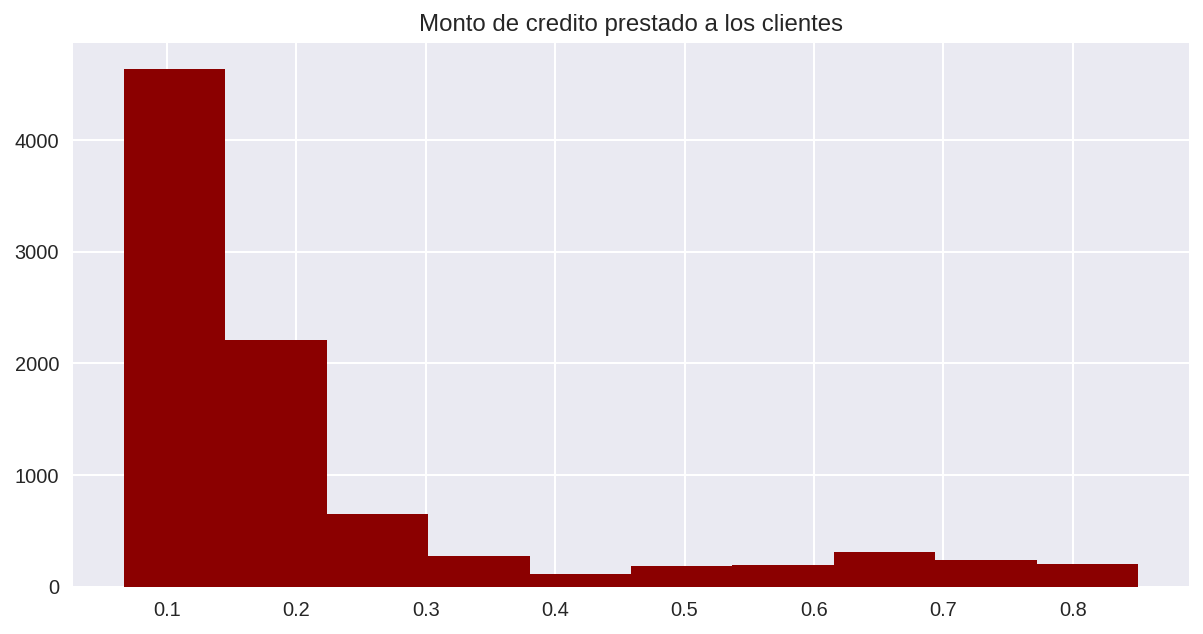

In [227]:
plt.figure(figsize=(10,5))
plt.hist(Prediccion_Modelo2_test,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()

In [229]:
Accuracy_Test_Modelo2=accuracy_score(y_test,Predicciones_test2)
print(Accuracy_Test_Modelo2)

0.8215555555555556


In [230]:
Reporte_Test_M2= metrics.classification_report(y_test,Predicciones_test2)
print(Reporte_Test_M2)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7009
           1       0.70      0.34      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.67      9000
weighted avg       0.81      0.82      0.80      9000



In [231]:
## Train
Prediccion_Modelo2_train=Modelogit5.predict(exog=x_train_1)
Predicciones_test2_trian=np.where(Prediccion_Modelo2_train < 0.5,0,1)

In [232]:
Accuracy_Train2=accuracy_score(y_train,Predicciones_test2_trian)
print(Accuracy_Train2)

0.8183809523809524


In [233]:
Prediccion_Modelo2_test.shape

(9000,)

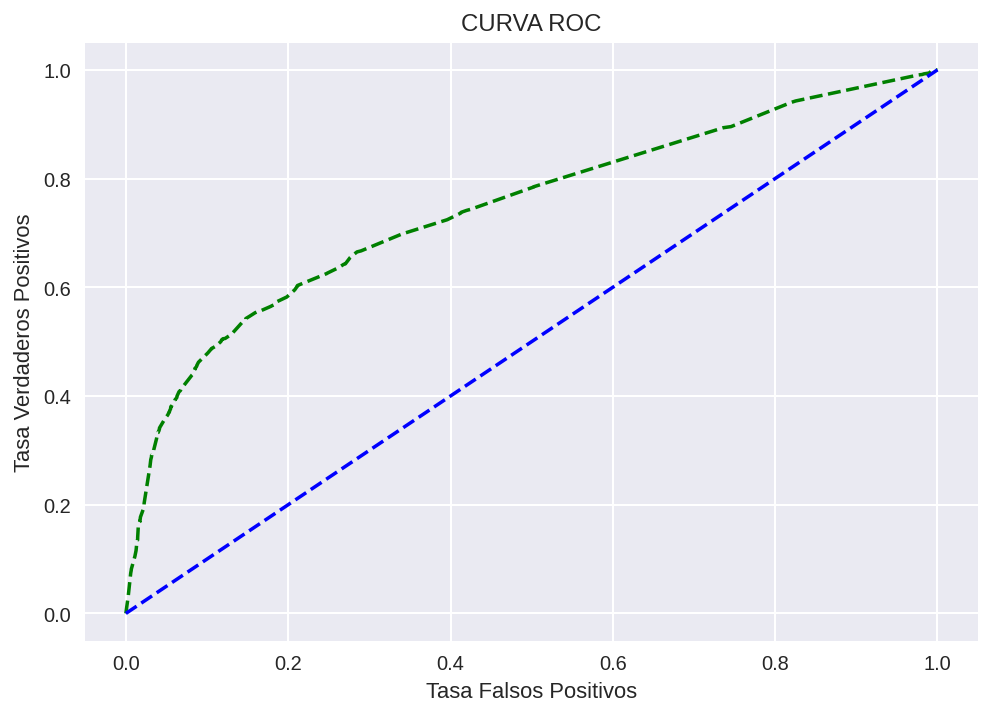

In [234]:
## Diagonal
fpr, tpr, thresholds = roc_curve(y_test, Prediccion_Modelo2_test)
AUC2=roc_auc_score(y_test, Prediccion_Modelo2_test)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle="--",color="green",label="Regresion Logit1")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("CURVA ROC")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa Verdaderos Positivos")
plt.show()

In [235]:
AUC2

0.7439556617992552

In [236]:
precision, recall, fscore, support = score(y_test,Predicciones_test2)
f1_Score_M2_0_test=fscore[0]
f1_Score_M2_1_test=fscore[1]

**Validacion de Modelo**
RESIDUOS DE REGRESIÓN LOGÍSTICA En la regresión lineal, se evalúan los residuos tal cual; sin embargo, los residuos del modelo de regresión logística deben transformarse para que sean útiles. Esto se debe a que la variable dependiente es binaria (0 o 1). Debido a la naturaleza binaria del resultado, los residuos no se distribuirán normalmente y se desconoce su distribución (Nachtsheim, Neter y Li, 2004). Los residuales evaluados entonces son los residuales de Pearson, los residuales de Pearson estudentizados y/o los residuales de desviación .

Una gráfica que es útil para diagnosticar el modelo de regresión logística es trazar los residuos de Pearson estudentizados, o los residuos de desviación, contra la probabilidad estimada o los valores predictores lineales con un suavizado de Lowess. Nachtsheim, Neter y Li (2004) muestran que, bajo el supuesto de que el modelo de regresión logística es correcto, el error (diferencia) entre el valor observado () y el valor predicho ( ) es igual a 0, es decir Concluyen que esto sugiere que un lowess smooth de una de las gráficas mencionadas anteriormente sería aproximadamente una línea horizontal con intersección cero; desafortunadamente, no brindan una sugerencia de cómo se ve "aproximadamente". Al observar las visualizaciones, es importante tener en cuenta que el tamaño y la escala de la imagen afectarán el aspecto de la visualización y, por lo tanto, afectarán la interpretación.

Ahora, para demostrar esto. StatsModels calcula los residuos de Pearson estudentizados (model.resid_pearson), así como los residuos de desviación (model.resid_dev) de forma predeterminada, lo que nos ahorra algo de tiempo.

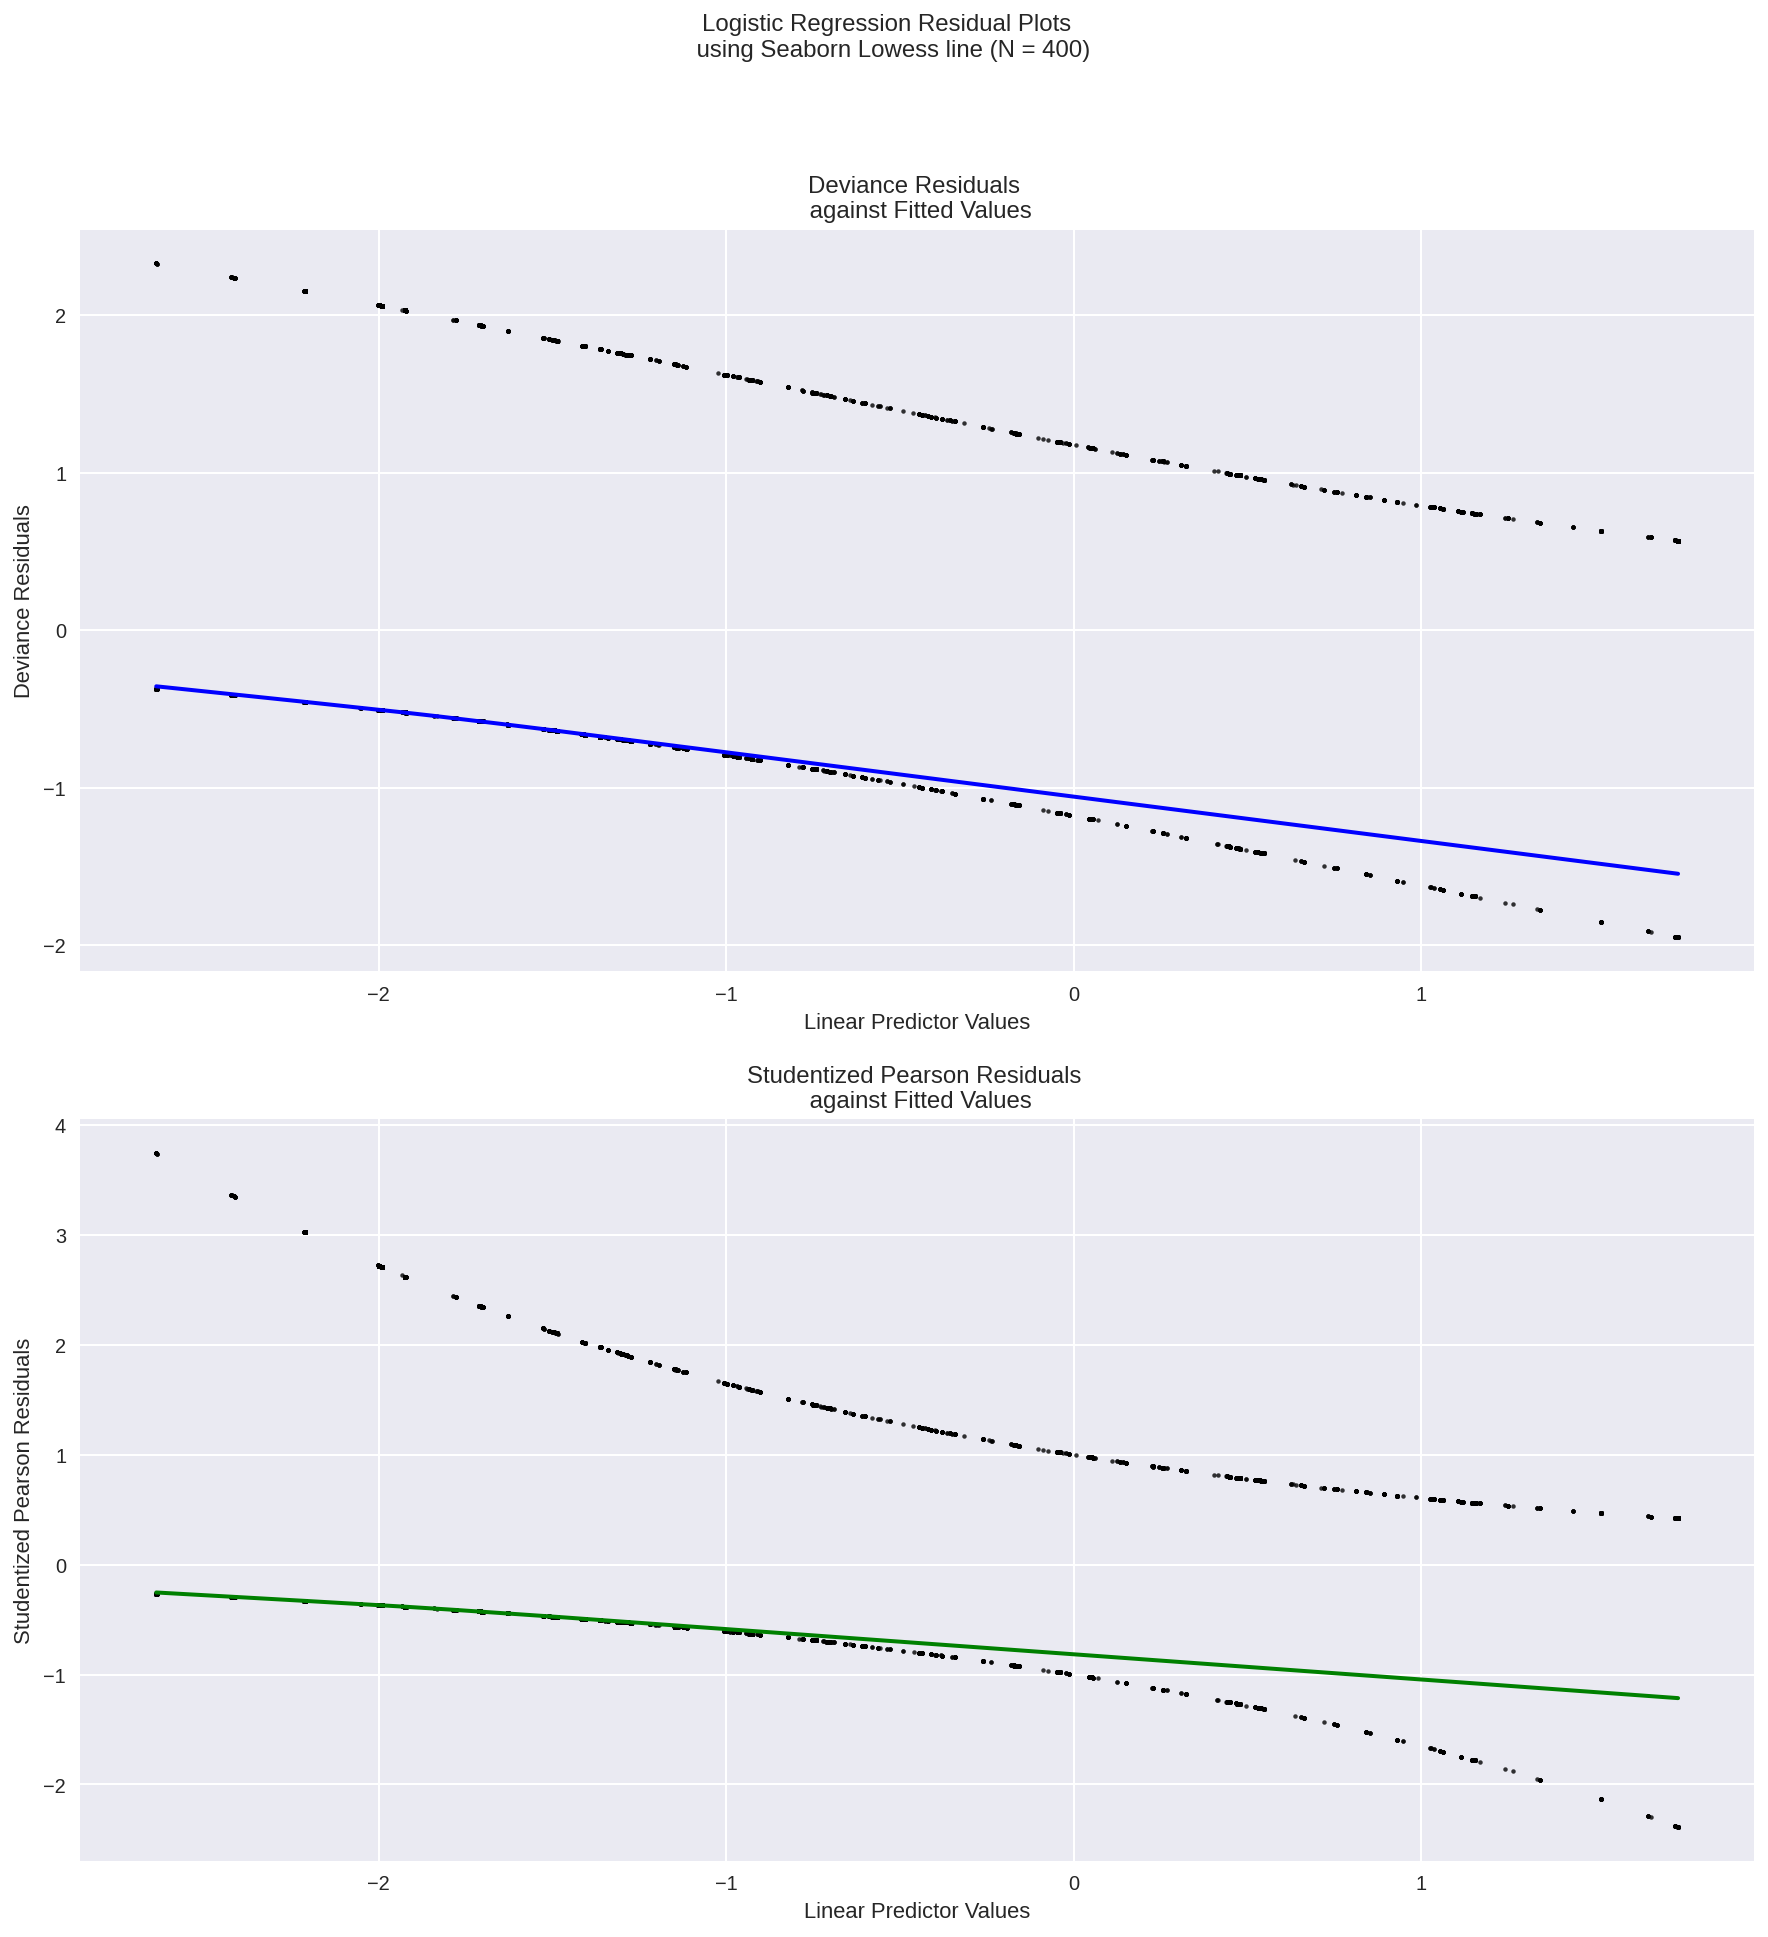

In [237]:
# Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 400)")

# Deviance Residuals
sns.regplot(Modelogit5.fittedvalues, Modelogit5.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(Modelogit5.fittedvalues, Modelogit5.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

### **4.5)Árboles de decisión con Python:clasificación**

¿Qué son los árboles de decisión?

* El enfoque classification and regression tree (CART) fue desarrollado por Breiman et al. (1984).
* Son un tipo de algoritmos de aprendizaje supervisado (i.e., existe una variable objetivo predefinida).
* Principalmente usados en problemas de clasificación.
* Las variables de entrada y salida pueden ser categóricas o continuas.
* Divide el espacio de predictores (variables independientes) en regiones distintas y no sobrepuestas.

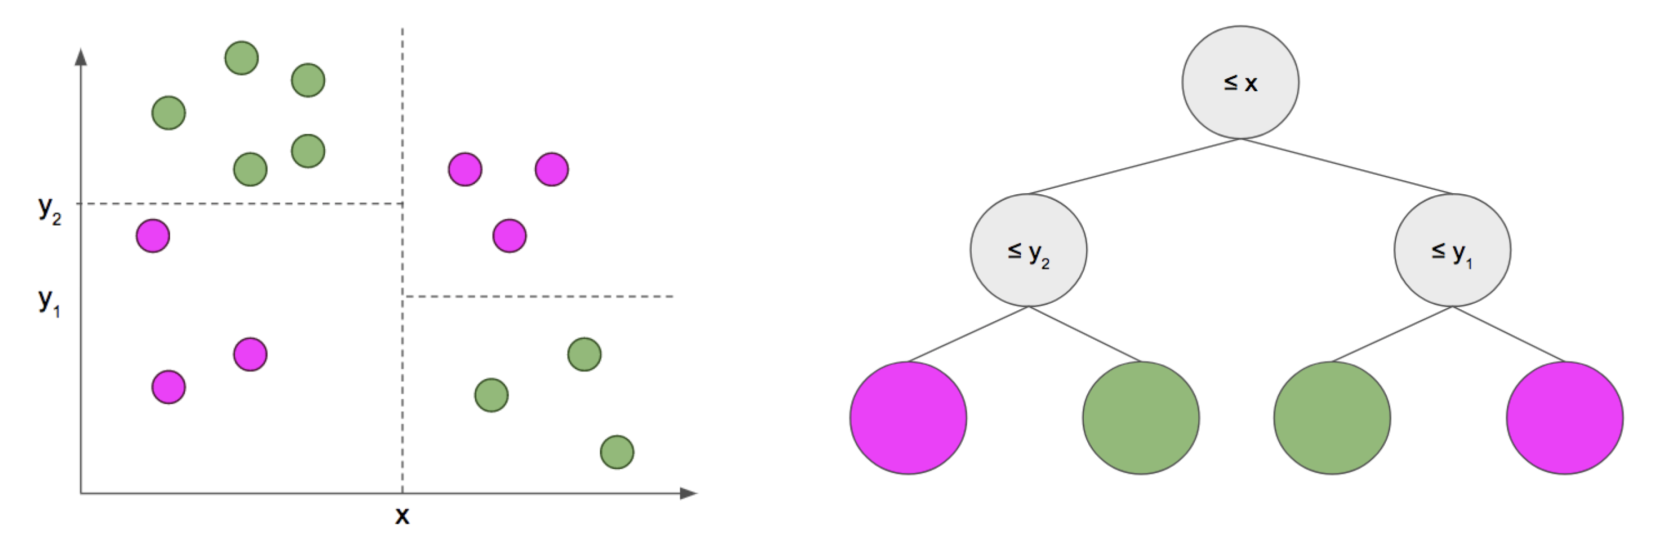

Se divide la población o muestra en conjuntos homegéneos basados en la variable de entrada más significativa. La construcción del árbol sigue un enfoque de división binaria recursiva (top-down greddy approach). Greedy -> analiza la mejor variable para ramificación sólo en el proceso de división actual

**Ventajas**

Fácil de entender
Util en exploración de datos:identificar importancia de variables a partir de cientos de variables.
Menos limpieza de datos: outliers y valores faltantes no influencian el modelo (A un cierto grado)
El tipo de datos no es una restricción
Es un método no paramétrico (i.e., no hay suposición acerca del espacio de distribución y la estructura del clasificador)

**Desventajas**

* Sobreajuste
* Pérdida de información al categorizar variables continuas
* Precisión: métodos como SVM y clasificadores tipo ensamblador a menudo tienen tasas de error 30% más bajas que CART (Classification and Regression Trees)
* Inestabilidad: un pequeño cambio en los datos puede modificar ampliamente la estructura del árbol. Por lo tanto la interpretación no es tan directa como parece.

**¿Cómo decide un árbol donde ramificarse?**

La decisión de hacer divisiones estratégicas afecta altamente la precisión del árbol.
Los criterios de decisión son diferentes para árboles de clasificación y regresión.
Existen varios algortmos para decidir la ramificación.
La creación de subnodos incrementa la homogeneidad de los subnodos resultantes. Es decir, la pureza del nodo se incrementa respecto a la variable objetivo.
Se prueba la división con todas las variables y se escoge la que produce subnodos más homogéneos.
Algunos algoritmos más comunes para la selección: Indice Gini, Chi Cuadrado, Ganancia de la información y Reducción en la varianza

**Indice Gini**

“Si seleccionamos aletoriamente dos items de una población, entonces estos deben ser de la misma clase y la probabilidad de esto es 1 si la población es pura”.

Variable objetivo categórica: “Success” o “Failure” Solo divisiones binarias A mayor valor de índice Gini, mayor la homogeneidad CART (Classification and Regression Tree) usa el método de Gini para la división binaria

**Cálculo de índice Gini**

* Calcular Gini para los subnodos usando la fórmula de la suma de los cuadrados de probabilidad para success y failure (p^2 + q^2).
+ Calcular Gini para la división usando score Gini ponderado para cada nodo de la división

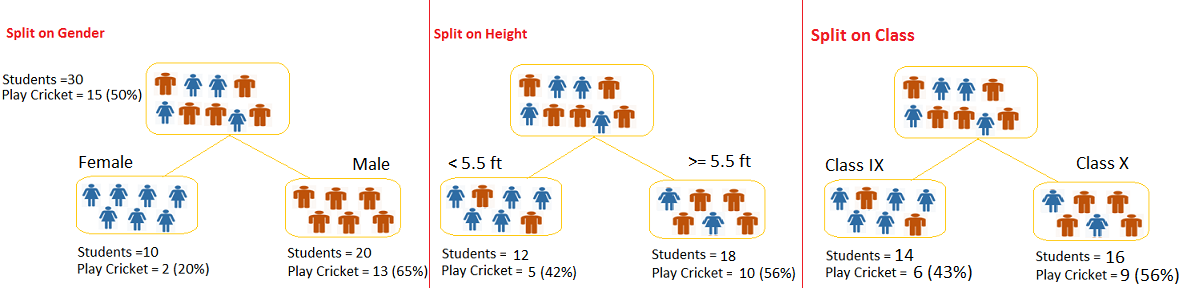

* Mujer (0.2)^2 + (0.8)^2 = 0.68 , IX (0.43)^2 +(0.57)^2 = 0.51
* Hombre (0.65)^2 + (0.35)^2 = 0.55, X (0.56)^2 +(0.44)^2 = 0.51
* Pond. (10/30)0.68 + (20/30)0.55 = 0.59, Pond. (14/30)0.51 + (16/30)0.51 = 0.51

**Entrenar el Arbol**

In [238]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
# Graficos
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import tree
# Para optimizar Modelos, Fase validacion
from sklearn.model_selection import GridSearchCV
# evaluar modelos

In [239]:
x_train.shape

(21000, 78)

In [240]:
Modelo_AD= DecisionTreeClassifier(criterion="gini",random_state=123)
Modelo_AD.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

**Graficar Arbol(Reglas Negocio)**

In [241]:
#fig, ax = plt.subplots(figsize=(30, 15))
#plot=plot_tree(decision_tree=Modelo_AD,
 #             feature_names=x_train.columns,
  #              filled        = True,
   #            fontsize      = 7,
    #          class_names="Prediccion de Default Credito",
     #           ax            = ax
      #        )

**Reglas**

In [242]:
x_train.columns

Index(['SEX_2', 'EDUCATION_2.0', 'EDUCATION_3.0', 'MARRIAGE_2.0',
       'MARRIAGE_3.0', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3',
       'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1',
       'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6',
       'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3',
       'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8', 'Mora_1',
       'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
  

In [243]:
reglas= tree.export_text(Modelo_AD)
print(reglas)

|--- feature_63 <= 0.50
|   |--- class: 0
|--- feature_63 >  0.50
|   |--- class: 1



**Importancia de Variables**

In [244]:
Importancia_Predictores=pd.DataFrame(
{"predictor":x_train.columns,
 "Importancia":Modelo_AD.feature_importances_})

Importancia_Predictores=Importancia_Predictores.sort_values("Importancia",ascending=False)
Importancia_Predictores=Importancia_Predictores.reset_index(drop=True)
#Importancia_Predictores

In [245]:
Importancia_Predictores.predictor[0:22].to_list()

['Mora_1',
 'SEX_2',
 'PAY_6_4',
 'PAY_6_2',
 'PAY_6_0',
 'PAY_6_-1',
 'PAY_5_8',
 'PAY_5_7',
 'PAY_5_6',
 'PAY_5_5',
 'PAY_5_4',
 'PAY_5_3',
 'PAY_5_2',
 'PAY_5_0',
 'PAY_5_-1',
 'PAY_4_8',
 'PAY_4_7',
 'PAY_4_6',
 'PAY_4_5',
 'PAY_6_3',
 'PAY_6_5',
 'EDUCATION_2.0']

**Error train**

In [246]:
Predicciones_Train_AD=Modelo_AD.predict(X=x_train)
Accuracy_Train_AD=metrics.accuracy_score(y_train,Predicciones_Train_AD)
print(Accuracy_Train_AD)

1.0


In [247]:
Reporte_Trian_AD=metrics.classification_report(y_train,Predicciones_Train_AD)
print(Reporte_Trian_AD)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16355
           1       1.00      1.00      1.00      4645

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



**Matrix Confusion**

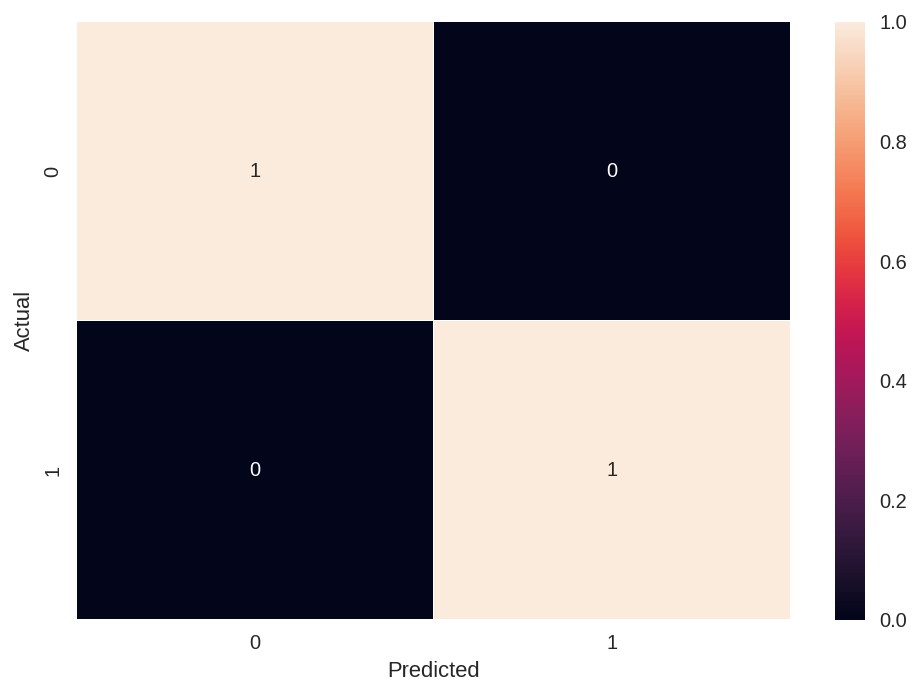

In [248]:
data1 = {"y_Actual":y_train,
        "y_Predicted": Modelo_AD.predict(x_train)
        }
df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix1 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_Normalizada=confusion_matrix1.astype('float') / confusion_matrix1.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada, annot=True,linewidths = 0.01)
plt.show()

**Error Test**

In [249]:
Predicciones_Test_AD=Modelo_AD.predict(X=x_test)
Accuracy_Test_AD=metrics.accuracy_score(y_test,Predicciones_Test_AD)
print(Accuracy_Test_AD)

1.0


* Accuray de train es 100% mientras el error de test es 73%, buscamos modelo que tengan errores similares, hay sobreajustee

In [250]:
Reporte_Test_AD=metrics.classification_report(y_test,Predicciones_Test_AD)
print(Reporte_Test_AD)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7009
           1       1.00      1.00      1.00      1991

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [251]:
precision, recall, fscore, support = score(y_test,Predicciones_Test_AD)
f1_Score_AD_0=fscore[0]
f1_Score_AD_1=fscore[1]

**Curva ROC**

1.0


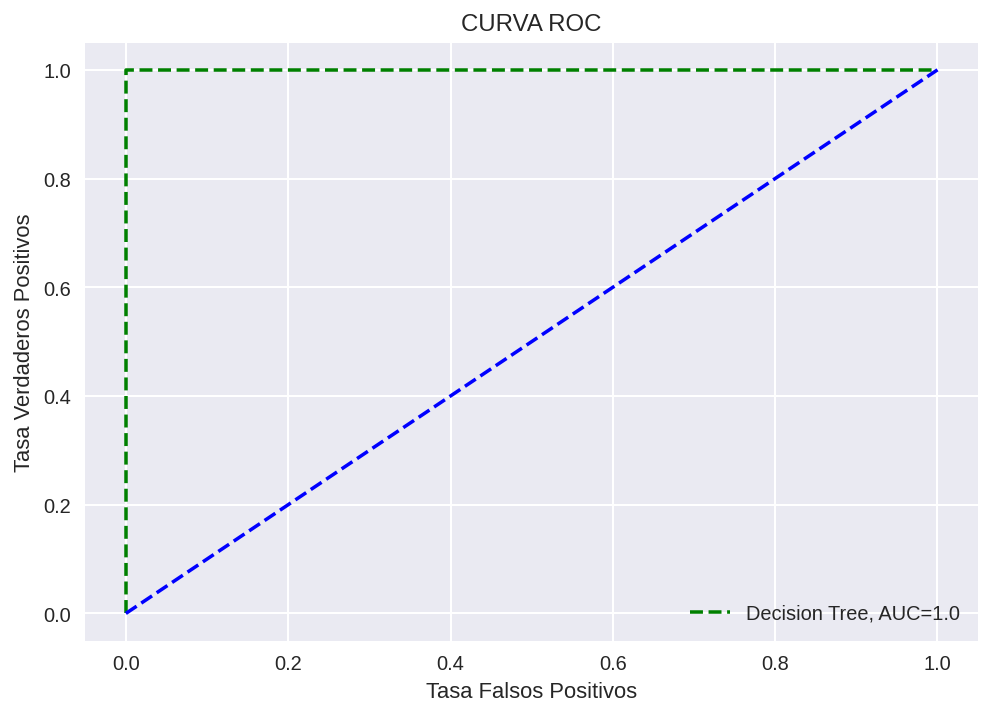

In [252]:
Probabilidad_test_AD=Modelo_AD.predict_proba(X=x_test)
fpr, tpr, thresholds = roc_curve(y_test, Probabilidad_test_AD[:,1])
AUC_AD=round(roc_auc_score(y_test, Probabilidad_test_AD[:,1]),2)
print(AUC_AD)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC_AD))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("CURVA ROC")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa Verdaderos Positivos")
plt.legend()
plt.show()

4.5.1) Arbol Pruned
Criterio de costo de complejidad - Cost complexity criterion

Para encontrar el balance entre la profundidad y complejidad del árbol con respecto a la capacidad predictiva del modelo en datos de test, normalmente se hace crecer el árbol de decisión hasta su mayor extensión y luego se ejecuta el proceso de poda para identificar el subárbol óptimo.

Se encuentra el subárbol óptimo usando el parámetro de costo de complejidad ( α ) que penaliza la función objetivo abajo para el número de nodos hoja en el árbol (T)

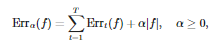

Para un valor dado de α se encuentra el árbol podado más pequeño (número de nodos hoja) que tiene el error más bajo de penalización.
Se evalúan múltiples moodelos a través de un espectro de α y se usa validación cruzada para identificar el α óptimo, y por lo tanto el subárbol óptimo

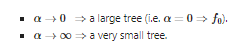

In [253]:
f=Modelo_AD
f.get_n_leaves()
f.get_depth()

f_alpha = f.cost_complexity_pruning_path(x_train, y_train)
alphas = f_alpha['ccp_alphas']
impurs = f_alpha['impurities']

fs = []
fs = []
for j in alphas:
    f = DecisionTreeClassifier(ccp_alpha=j, random_state=77)
    f.fit(x_train, y_train)
    fs.append(f)
fs
nodes = []
depth = []
for j in range(0, alphas.shape[0]):
    nodes.append(fs[j].tree_.node_count)
    depth.append(fs[j].tree_.max_depth)
train_scores = [f.score(x_train, y_train) for f in fs]
test_scores  = [f.score(x_test, y_test)   for f in fs]

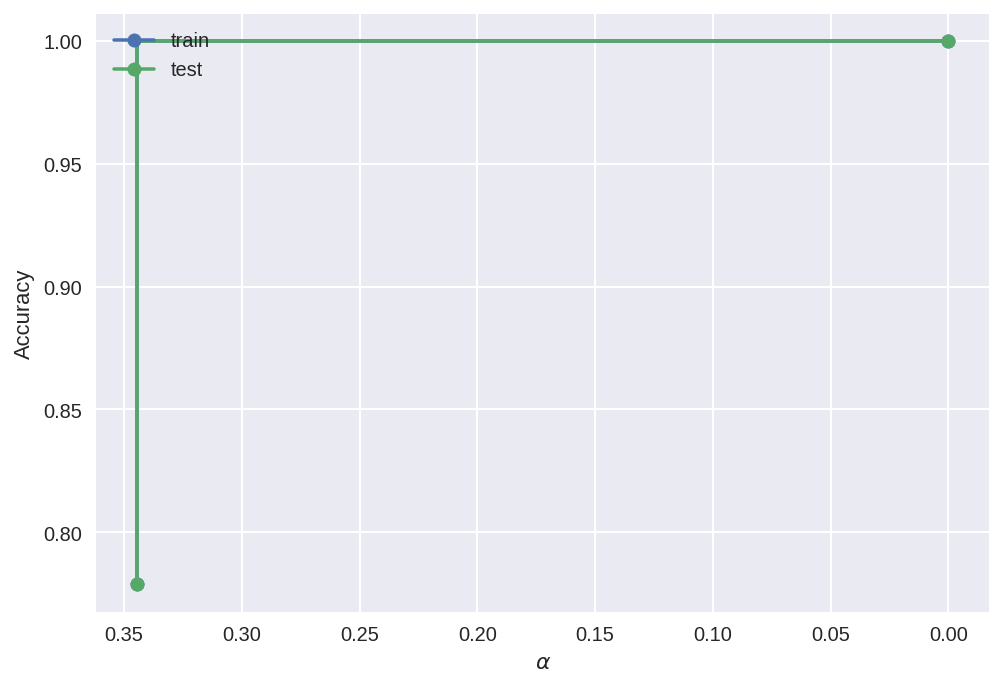

In [254]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Accuracy')
#ax.set_title(r'Accuracy vs $\alpha$')
ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores,  marker='o', label='test',  drawstyle='steps-post')
ax.invert_xaxis()
ax.legend()
plt.show()